# **Spotify Machine Learning Project**

**Authors:** Vraj Patel: 118788272, Rishi Zarkar: 118842974, Shreyas Ambarkar: 118762791

####**Main Question:** What insights can be derived from analyzing the audio features of a song, and how can these insights inform our understanding of the song's popularity, genre classification and could it be used to reccomend similar songs?



This project aims to explore and analyze various musical features to determine their impact on a song's popularity, explicitness, and category. By examining audio attributes such as energy, danceability, loudness, tempo, etc. we seek to uncover patterns and relationships that could explain why certain tracks resonate more with audiences.



---






#Outline:
### Data Preproccessing


### General Data Exploration



### Explicit Song Classification


### Song Popularity Predictor


### Recommendation Engine





#Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_samples

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')



---



# Data Cleaning and Preprocessing


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
file_path = '/content/drive/MyDrive/data 2.csv'
df = pd.read_csv(file_path)
df.head()

acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode  \
0   10    0.1510   -12.428     1   
1    8    0.0763   -28.454     1   
2    5    0.1190   -19.924     0   
3    1    0.1110   -14.734     0   
4   11    0.0980   -16.829     1   

                                            name  popularity release_date  \
0                    Singende Bataillone 1. Teil           0         1928   
1       Fantasiestücke, Op. 111: Più tosto lento           0         1928   
2                 Chapter 1.18 - Zamek kaniowski           0         1928   
3  Bebamos Juntos - Instrumental (Remasterizado)           0   1928-09-25   
4    Polonaise-Fantaisie in A-Flat Major, Op. 61           1         1928   

   speechiness    tempo  valence  year  
0       0.0506  118.469   0.7790  1928  
1       0.0462   83.972   0.0767  1928  
2       0.9290  107.177   0.8800  1928  
3       0.0926  108.003   0.7200  1928  
4       0.0424   62.149   0.0693  1928

In [10]:
df.shape

(169909, 19)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [12]:
df.isna().sum() # check for null values
df.duplicated().any().sum() # check for duplicate  values

0

In [13]:
df.describe()

acousticness   danceability   duration_ms         energy  \
count  169909.000000  169909.000000  1.699090e+05  169909.000000   
mean        0.493214       0.538150  2.314062e+05       0.488593   
std         0.376627       0.175346  1.213219e+05       0.267390   
min         0.000000       0.000000  5.108000e+03       0.000000   
25%         0.094500       0.417000  1.710400e+05       0.263000   
50%         0.492000       0.548000  2.086000e+05       0.481000   
75%         0.888000       0.667000  2.629600e+05       0.710000   
max         0.996000       0.988000  5.403500e+06       1.000000   

            explicit  instrumentalness            key       liveness  \
count  169909.000000     169909.000000  169909.000000  169909.000000   
mean        0.084863          0.161937       5.200519       0.206690   
std         0.278679          0.309329       3.515257       0.176796   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       2.000000       0.098400   
50%         0.000000          0.000204       5.000000       0.135000   
75%         0.000000          0.086800       8.000000       0.263000   
max         1.000000          1.000000      11.000000       1.000000   

            loudness           mode     popularity    speechiness  \
count  169909.000000  169909.000000  169909.000000  169909.000000   
mean      -11.370289       0.708556      31.556610       0.094058   
std         5.666765       0.454429      21.582614       0.149937   
min       -60.000000       0.000000       0.000000       0.000000   
25%       -14.470000       0.000000      12.000000       0.034900   
50%       -10.474000       1.000000      33.000000       0.045000   
75%        -7.118000       1.000000      48.000000       0.075400   
max         3.855000       1.000000     100.000000       0.969000   

               tempo        valence           year  
count  169909.000000  169909.000000  169909.000000  
mean      116.948017       0.532095    1977.223231  
std        30.726937       0.262408      25.593168  
min         0.000000       0.000000    1921.000000  
25%        93.516000       0.322000    1957.000000  
50%       114.778000       0.544000    1978.000000  
75%       135.712000       0.749000    1999.000000  
max       244.091000       1.000000    2020.000000

Exploding the artists to a list and changing from miliseconds to minutes for better readability

In [14]:
def format_artists(artists):
    if artists and artists.startswith('[') and artists.endswith(']'):
        artists_list = re.findall(r"'([^']*)'", artists)
        return ', '.join(artists_list)
    return artists


df['artists'] = df['artists'].apply(format_artists)

In [15]:
df['duration_min'] = df['duration_ms'] / 60000
df = df.drop(columns=['release_date', 'duration_ms'])

# General Data Exploration

In [16]:
tracks = df
new_format = {
    'id': 'object',
    'name': 'object',
    'popularity': 'int64',
    'explicit': 'int64',
    'artists': 'object',
    'year': 'int64',
    'danceability': 'float64',
    'energy': 'float64',
    'key': 'int64',
    'loudness': 'float64',
    'mode': 'int64',
    'speechiness': 'float64',
    'acousticness': 'float64',
    'instrumentalness': 'float64',
    'liveness': 'float64',
    'valence': 'float64',
    'tempo': 'float64',
}

tracks.reindex(columns=new_format.keys())

id                                           name  \
0       6KbQ3uYMLKb5jDxLF7wYDD                    Singende Bataillone 1. Teil   
1       6KuQTIu1KoTTkLXKrwlLPV       Fantasiestücke, Op. 111: Più tosto lento   
2       6L63VW0PibdM1HDSBoqnoM                 Chapter 1.18 - Zamek kaniowski   
3       6M94FkXd15sOAOQYRnWPN8  Bebamos Juntos - Instrumental (Remasterizado)   
4       6N6tiFZ9vLTSOIxkj8qKrd    Polonaise-Fantaisie in A-Flat Major, Op. 61   
...                        ...                                            ...   
169904  4KppkflX7I3vJQk7urOJaS                  Skechers (feat. Tyga) - Remix   
169905  1ehhGlTvjtHo2e4xJFB0SZ                 Sweeter (feat. Terrace Martin)   
169906  52eycxprLhK3lPcRLbQiVk                               How Would I Know   
169907  3wYOGJYD31sLRmBgCvWxa4                                    I Found You   
169908  60RFlt48hm0l4Fu0JoccOl                          More Hearts Than Mine   

        popularity  explicit                             artists  year  \
0                0         0                     Carl Woitschach  1928   
1                0         0  Robert Schumann, Vladimir Horowitz  1928   
2                0         0                 Seweryn Goszczyński  1928   
3                0         0                    Francisco Canaro  1928   
4                1         0  Frédéric Chopin, Vladimir Horowitz  1928   
...            ...       ...                                 ...   ...   
169904          75         1                    DripReport, Tyga  2020   
169905          64         0        Leon Bridges, Terrace Martin  2020   
169906          70         0                     Kygo, Oh Wonder  2020   
169907          70         0             Cash Cash, Andy Grammer  2020   
169908          65         0                      Ingrid Andress  2020   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.708  0.1950   10   -12.428     1       0.0506        0.9950   
1              0.379  0.0135    8   -28.454     1       0.0462        0.9940   
2              0.749  0.2200    5   -19.924     0       0.9290        0.6040   
3              0.781  0.1300    1   -14.734     0       0.0926        0.9950   
4              0.210  0.2040   11   -16.829     1       0.0424        0.9900   
...              ...     ...  ...       ...   ...          ...           ...   
169904         0.875  0.4430    1    -7.461     1       0.1430        0.1730   
169905         0.719  0.3850    8   -10.907     1       0.0403        0.0167   
169906         0.514  0.5390    7    -9.332     1       0.1050        0.5380   
169907         0.646  0.7610    1    -2.557     1       0.0385        0.0714   
169908         0.512  0.4280    0    -7.387     1       0.0271        0.1090   

        instrumentalness  liveness  valence    tempo  
0               0.563000    0.1510   0.7790  118.469  
1               0.901000    0.0763   0.0767   83.972  
2               0.000000    0.1190   0.8800  107.177  
3               0.887000    0.1110   0.7200  108.003  
4               0.908000    0.0980   0.0693   62.149  
...                  ...       ...      ...      ...  
169904          0.000032    0.0891   0.3060  100.012  
169905          0.031300    0.1110   0.2700  128.000  
169906          0.002330    0.1080   0.1530  123.700  
169907          0.000000    0.2220   0.4720  129.916  
169908          0.000000    0.1050   0.3660   80.588  

[169909 rows x 17 columns]

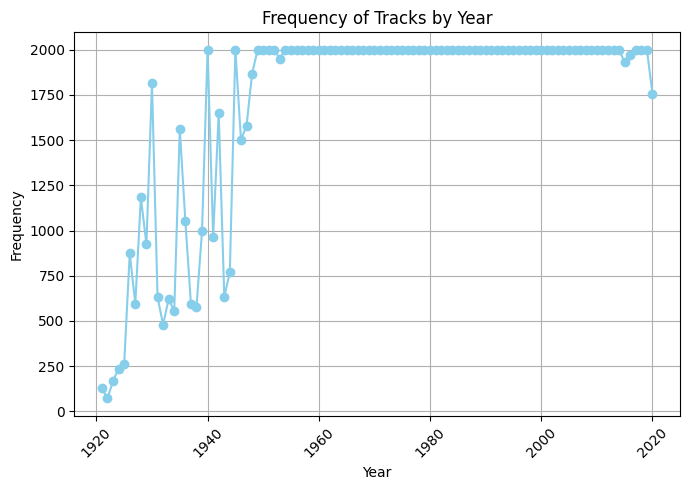

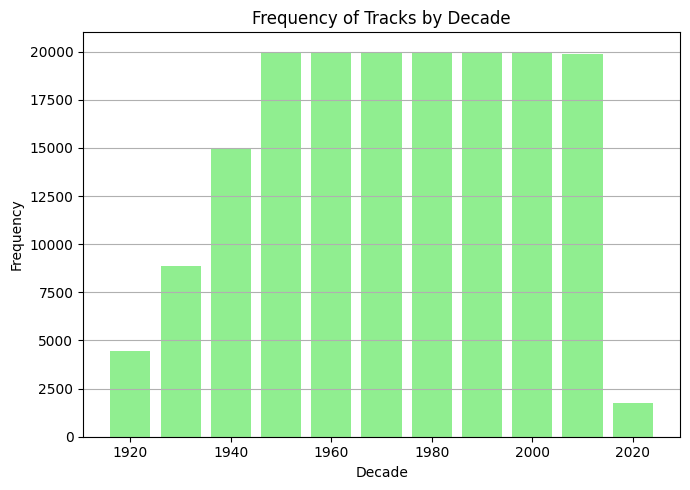

In [17]:
yearly_counts = tracks['year'].value_counts().sort_index()


tracks['decade'] = (tracks['year'] // 10) * 10
decade_counts = tracks['decade'].value_counts().sort_index()


plt.figure(figsize=(7, 5))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='skyblue')
plt.title('Frequency of Tracks by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
plt.bar(decade_counts.index, decade_counts.values, color='lightgreen', width=8)
plt.title('Frequency of Tracks by Decade')
plt.xlabel('Decade')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The data set we drew from is more heavily based on more recent music

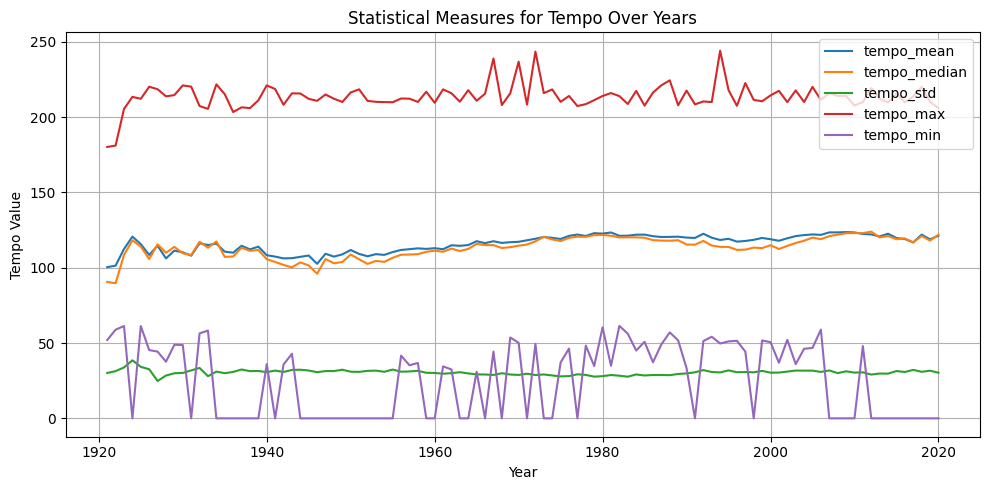

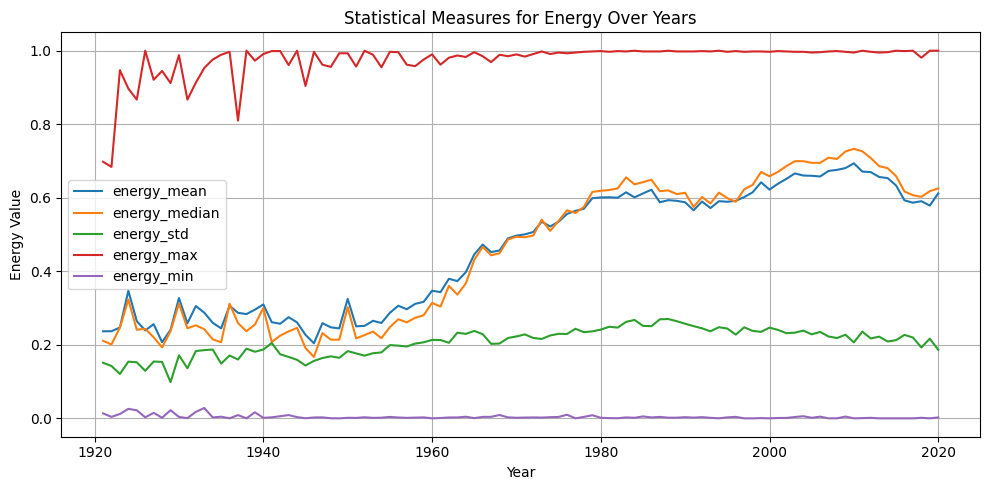

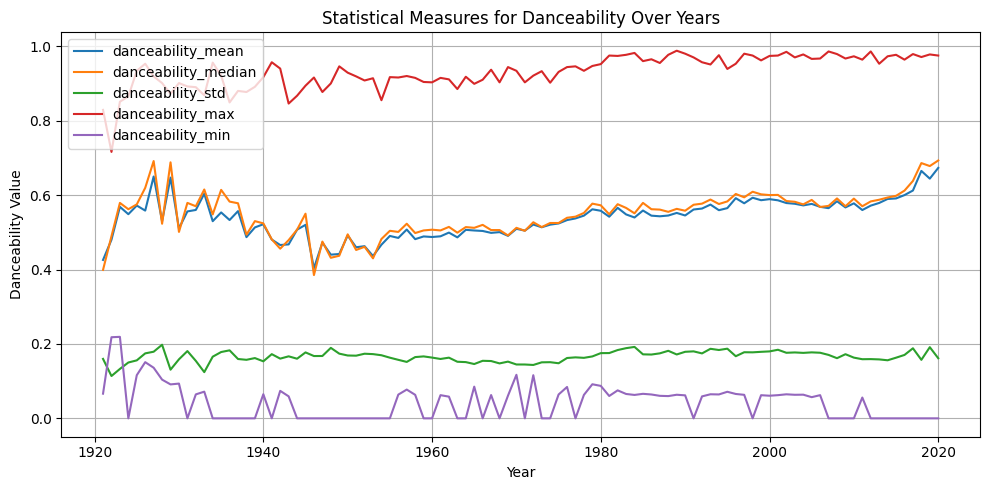

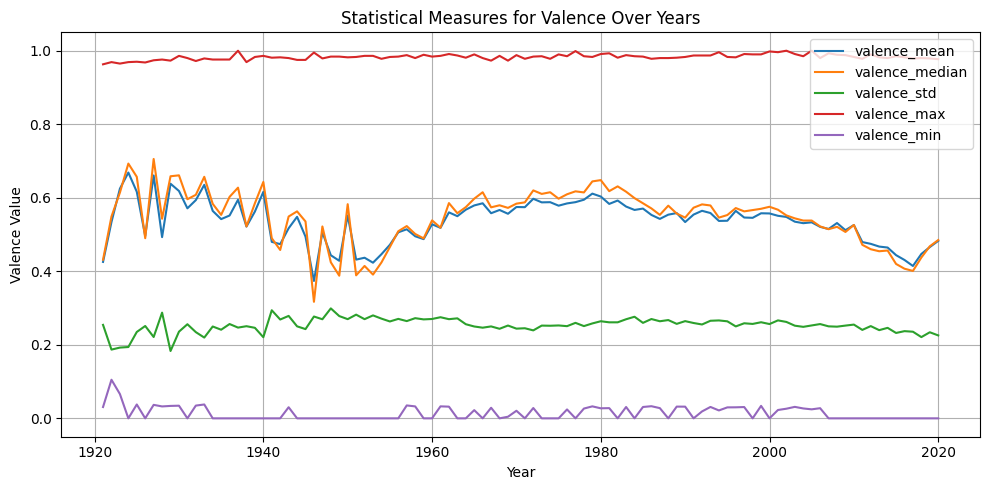

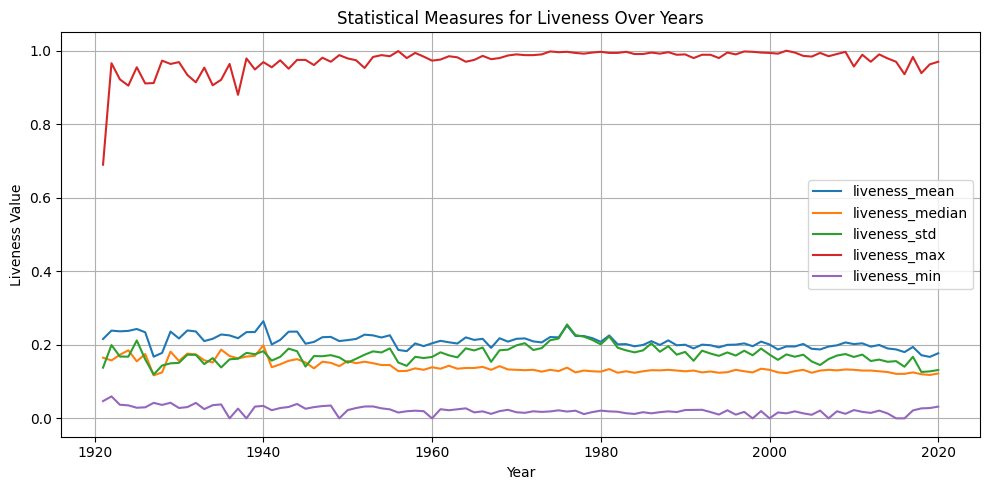

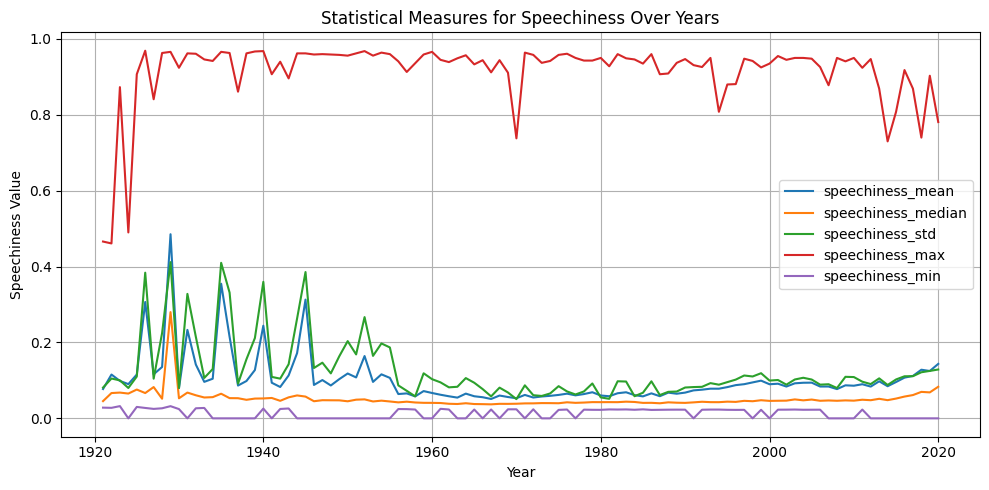

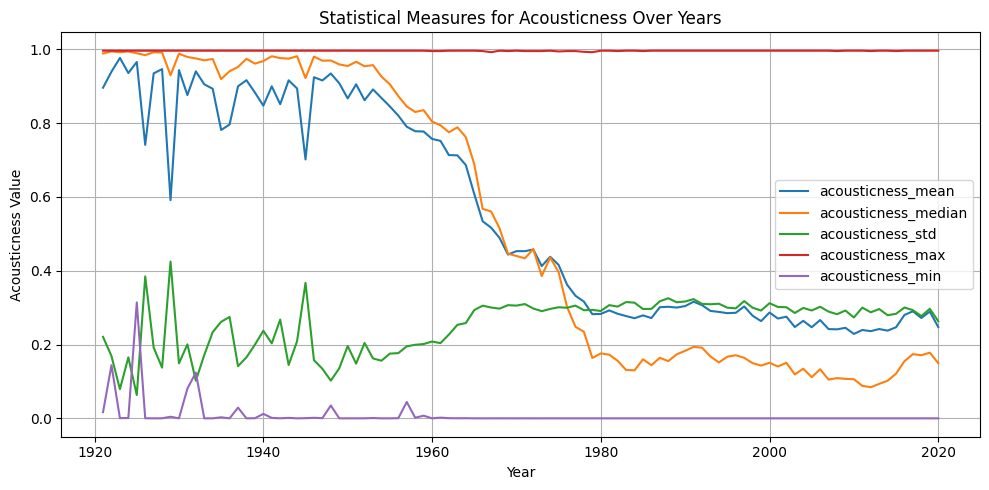

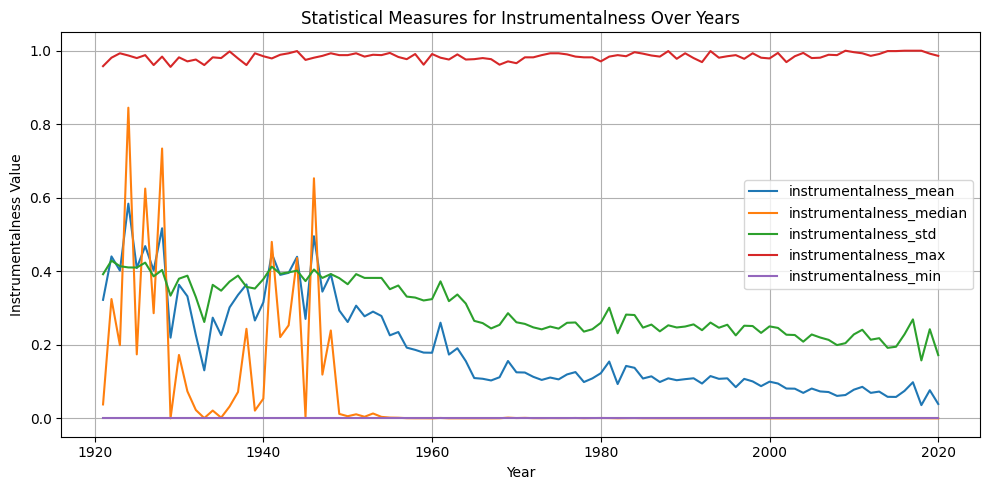

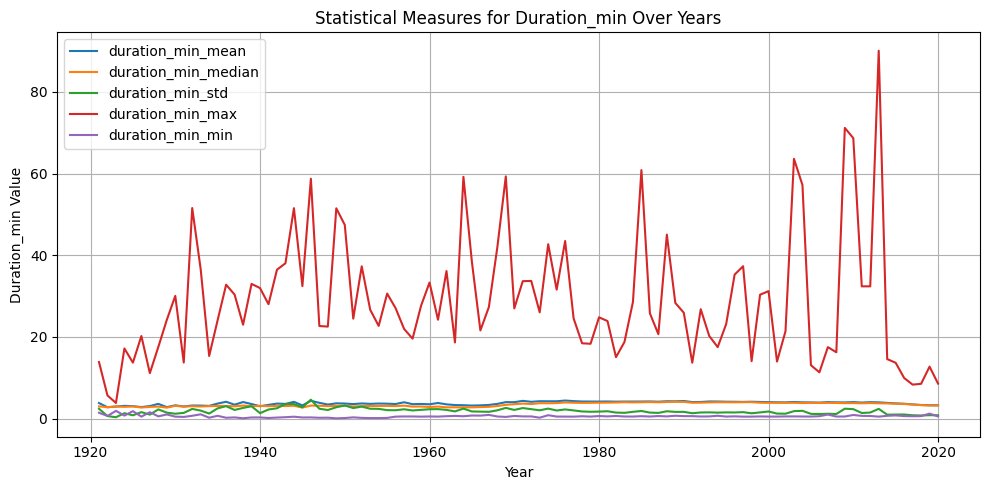

In [18]:
feature_columns = ['tempo', 'energy', 'danceability', 'valence', 'liveness', 'speechiness', 'acousticness', 'instrumentalness', 'duration_min']

yearly_stats = tracks.groupby('year')[feature_columns].agg(['mean', 'median', 'std', 'max', 'min'])
yearly_stats.columns = ['_'.join(col).strip() for col in yearly_stats.columns.values]


def plot_feature_stats(feature, stats_df):
    plt.figure(figsize=(10, 5))
    stats_df[[f"{feature}_mean", f"{feature}_median", f"{feature}_std", f"{feature}_max", f"{feature}_min"]].plot(ax=plt.gca())
    plt.title(f'Statistical Measures for {feature.capitalize()} Over Years')
    plt.xlabel('Year')
    plt.ylabel(f'{feature.capitalize()} Value')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot each feature
for feature in feature_columns:
    plot_feature_stats(feature, yearly_stats)


Tempo has slightly increased over the years however energy has increased by a significantly larger magnitude. The other features mostly stayed the same but one interesting finding is that the standard deviation for instrumentalness and especially speechiness decreased over the years meaning that in these 2 forms music became more normalized.

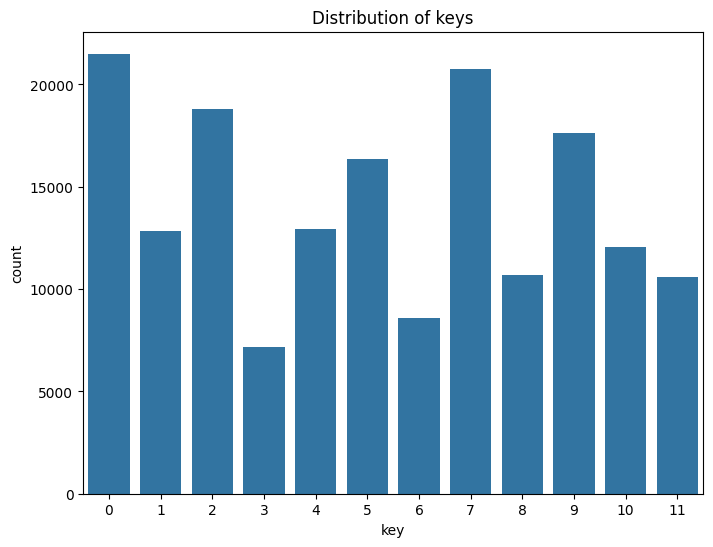

In [19]:
plt.figure(figsize=(8, 6))

sns.countplot(data=tracks, x='key')
plt.title('Distribution of keys')
plt.show()

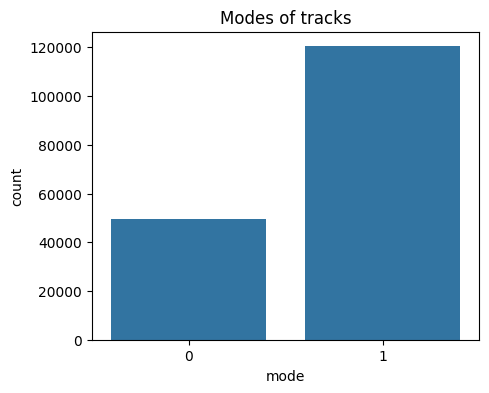

Ratio of modes: 70.86 % of songs are in Major, 29.14 % in Minor


In [20]:
percentage_major = len(tracks[tracks['mode'] == 1])/ tracks.shape[0] * 100
percentage_minor = len(tracks[tracks['mode'] == 0])/ tracks.shape[0] * 100
plt.figure(figsize=(5, 4))
sns.countplot(data=tracks, x='mode')
plt.title('Modes of tracks')
plt.show()
print('Ratio of modes: {:.2f} % of songs are in Major, {:.2f} % in Minor'.format(percentage_major, percentage_minor))

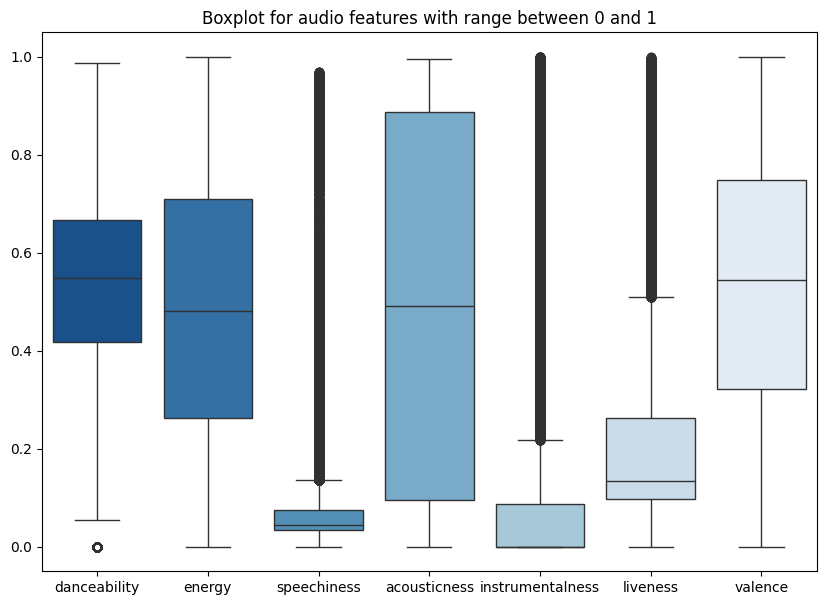

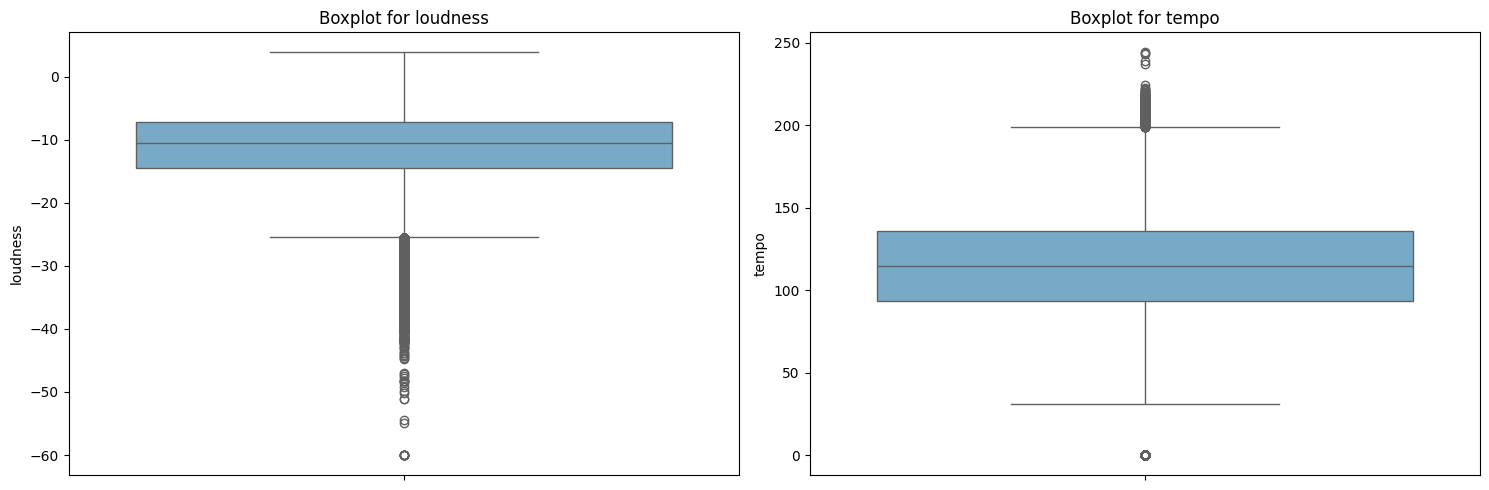

In [21]:
audio_ft = ['danceability', 'energy', 'speechiness',
             'acousticness', 'instrumentalness', 'liveness', 'valence']

# boxplots for audio features, features with range [0, 1] can be shown in one figure
plt.figure(figsize=(10, 7))
sns.boxplot(data=tracks.loc[:, audio_ft], palette='Blues_r')
plt.title('Boxplot for audio features with range between 0 and 1')
plt.show()

f, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
sns.boxplot(data=tracks.loc[:, 'loudness'], palette='Blues', ax=axes[0])
axes[0].set_title('Boxplot for loudness')
sns.boxplot(data=tracks.loc[:, 'tempo'], palette='Blues', ax=axes[1])
axes[1].set_title('Boxplot for tempo')
plt.tight_layout()

Acousticness has the largest range between the bottom and top edge of the box.
Instrumentalness but also speechiness have a really low .75 percentile and a higher number of outliers. That means that their are similar for most of the tracks, so they might not be so important as features for the model.
For loudness and tempo, they mostly are distributed in a certain small range with a number of outliers.

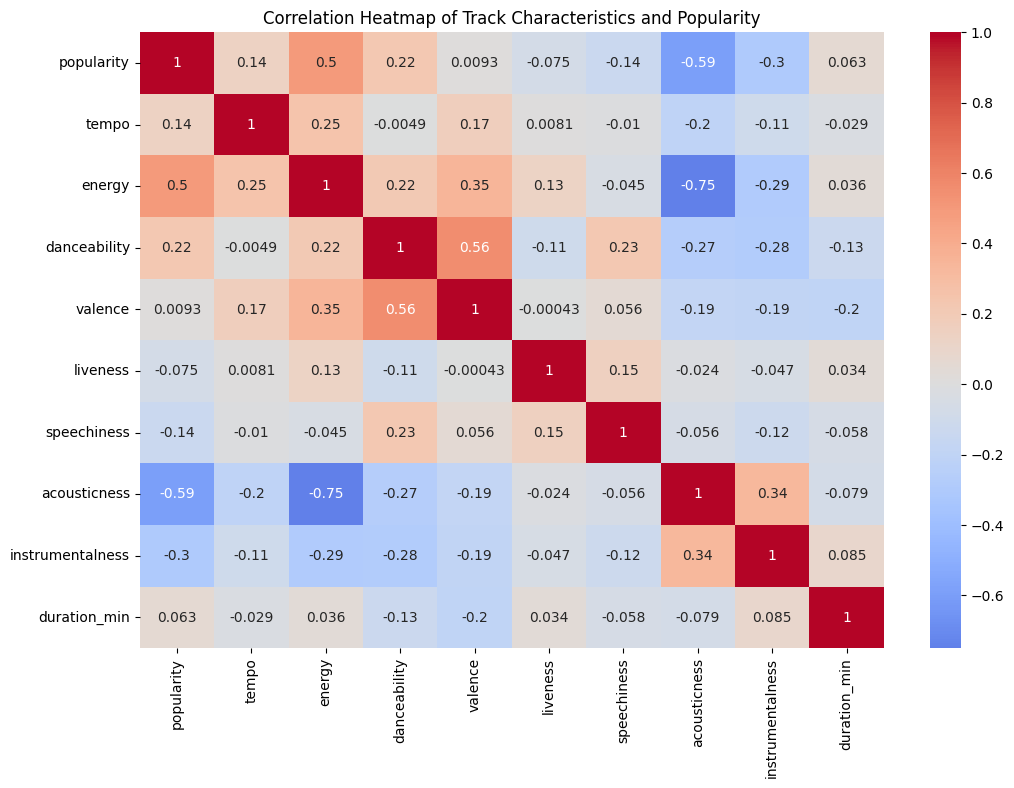

In [22]:
feature_columns = ['popularity', 'tempo', 'energy', 'danceability', 'valence', 'liveness', 'speechiness', 'acousticness', 'instrumentalness', 'duration_min']

df_selected = tracks[feature_columns]
correlation_matrix = df_selected.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Track Characteristics and Popularity')
plt.show()


Acousticness and energy are highly correlated with popularity of a song. The danceability also plays a factor although not as big.

high positive correlation: energy - loudness, valence - danceability

high negative correlation: acousticness - energy, acousticness - loudness

The correlations imply some linear relations between some audio features, so I will remove energy from my features for the model.

**Feature Engineering**

Feature engineering is critical for optimizing our dataset for the learning models we plan on using (classification, regression, and clustering).

- Converting duration to seconds standardizes the time
- Categorizing tempo into buckets simplifies the analysis for classification models by grouping
- Normalizing loudness prevents features with different scales from skewing the data
- New combined terms like energy_danceability allow the models to learn from combined effects
- Calculating the mean and standard deviation of audio features provides a summary that helps models understand overall trends and variability


These features seek to improve the dataset, ensuring our models are well-equipped to derive meaningful and accurate predictions.


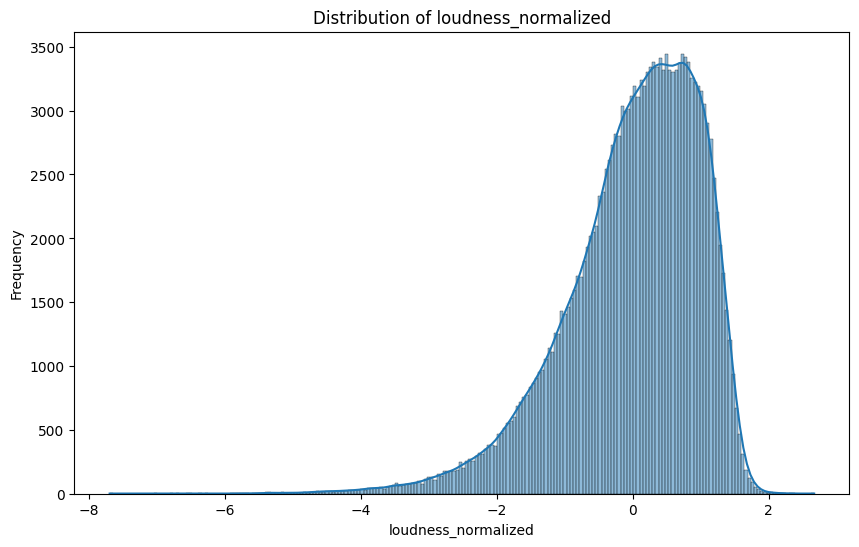

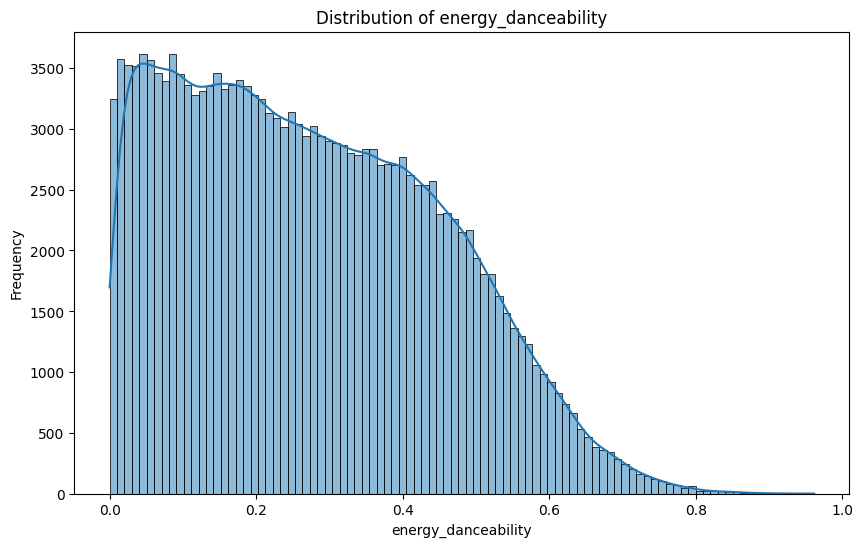

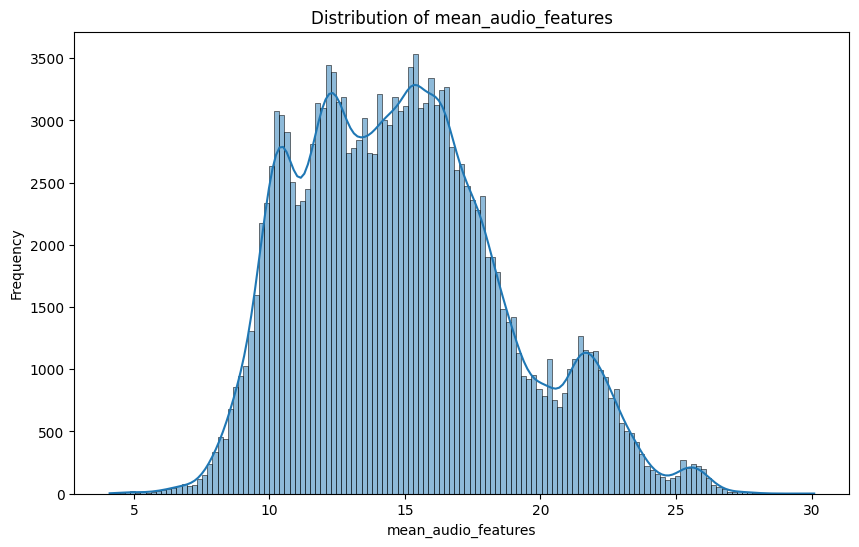

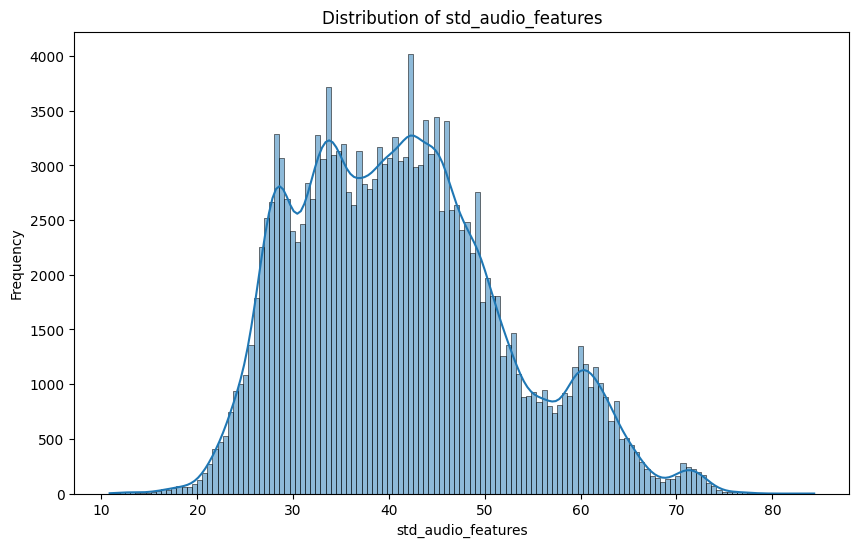

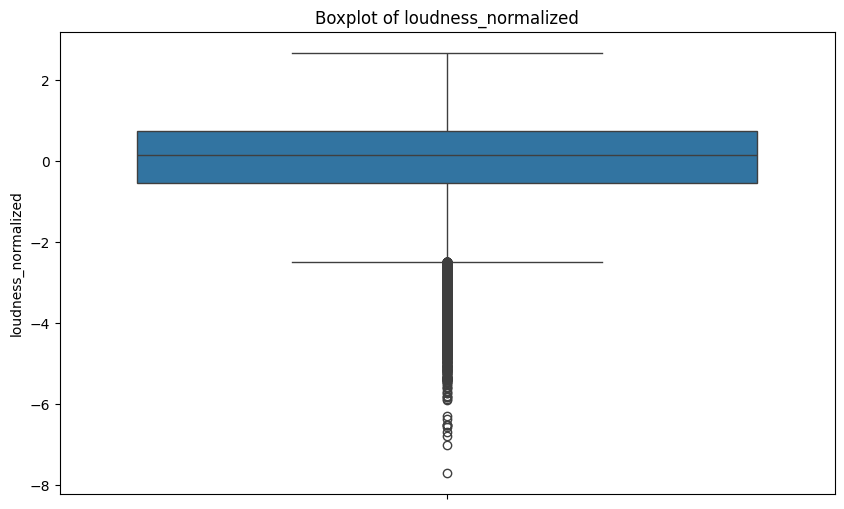

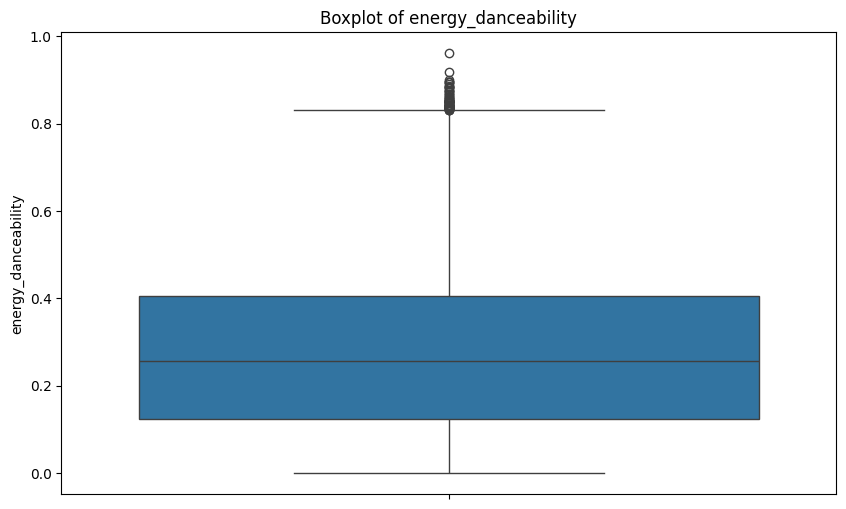

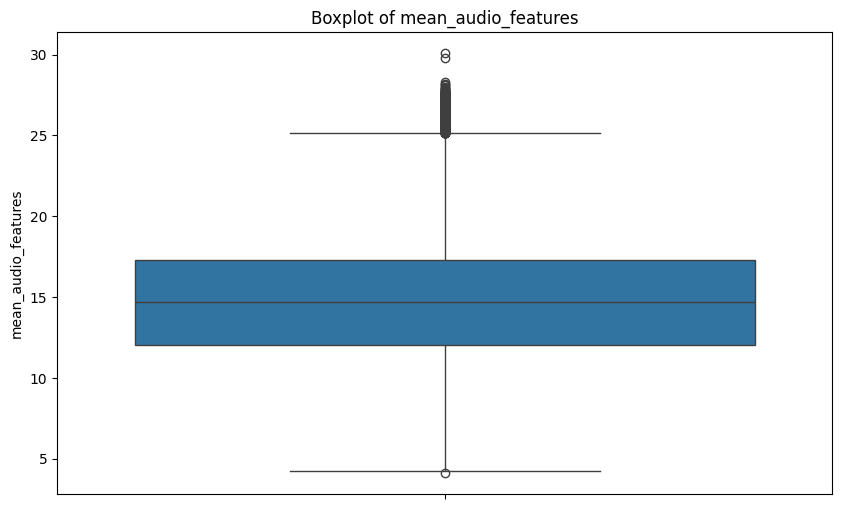

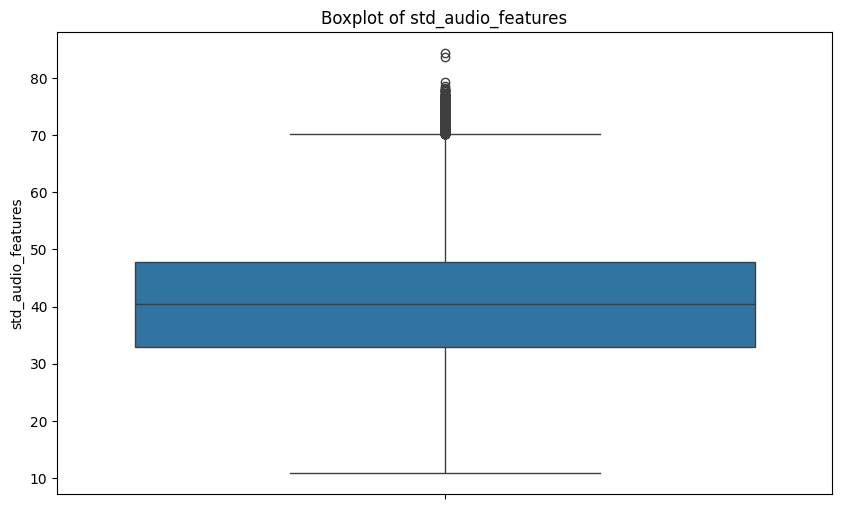

In [28]:
# Create a copy of the dataframe (feature engineering for EDA and classification)
df_feature_engineering = df.copy()

# Feature Engineering

# Tempo Categories
df_feature_engineering['tempo_bin'] = pd.cut(df_feature_engineering['tempo'], bins=[0, 60, 120, 180, 240], labels=['Slow', 'Moderate', 'Fast', 'Very Fast'])

# Loudness normalization (z-score normalization)
scaler = StandardScaler()
df_feature_engineering['loudness_normalized'] = scaler.fit_transform(df_feature_engineering[['loudness']])

# Energy-Danceability
df_feature_engineering['energy_danceability'] = df_feature_engineering['energy'] * df_feature_engineering['danceability']

# Handle missing values
df_feature_engineering = df_feature_engineering.dropna()

# Mean and standard deviation of selected audio features
audio_features = ['danceability', 'energy', 'speechiness', 'valence', 'acousticness', 'instrumentalness', 'tempo', 'liveness']
df_feature_engineering['mean_audio_features'] = df_feature_engineering[audio_features].mean(axis=1)
df_feature_engineering['std_audio_features'] = df_feature_engineering[audio_features].std(axis=1)

# Encode categorical variables
df_feature_engineering = pd.get_dummies(df_feature_engineering, columns=['tempo_bin'], drop_first=True)

# Remove duplicate columns if any
df_feature_engineering = df_feature_engineering.loc[:, ~df_feature_engineering.columns.duplicated()]

# List of numeric features
numeric_features = ['loudness_normalized', 'energy_danceability', 'mean_audio_features', 'std_audio_features']

# Plot histograms for numeric features
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_feature_engineering[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Plot boxplots for numeric features
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df_feature_engineering[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    plt.show()

# Select features for pairplot
selected_features_for_pairplot = ['loudness_normalized', 'energy_danceability', 'mean_audio_features', 'std_audio_features', 'explicit']



# Explicit Song Classification

Random Forest Classification - In this section lets first employ a Random Forest model to predict whether a song is explicit based on various audio features.

In [29]:
df_classification = df_feature_engineering.copy()

# Drop categoricals
columns_to_drop = ['artists', 'id', 'name', 'release_date', 'tempo_category']
df_classification = df_classification.drop(columns=[col for col in columns_to_drop if col in df_classification.columns])

X = df_classification.drop(columns=['explicit'])
y = df_classification['explicit']

# Reduce the size of the dataset for feature selection
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.95, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_sample, y_sample)

# Get feature importances
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Select top n features
n_features = 5
selected_features = X.columns[indices[:n_features]]
print("Selected Features:", selected_features)

Selected Features: Index(['speechiness', 'year', 'danceability', 'acousticness',
       'energy_danceability'],
      dtype='object')


First we remove non-numeric columns and encode categorical variables to ensure all features are numeric and suitable for machine learning models.

Then we uses a RandomForestClassifier on a sample of the data to identify the top five most important features which are most likely to have the greatest predictive power for the explicit classification task.








Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     31062
           1       0.77      0.57      0.66      2890

    accuracy                           0.95     33952
   macro avg       0.87      0.78      0.81     33952
weighted avg       0.94      0.95      0.95     33952

Random Forest Accuracy with Selected Features: 0.9489868049010367


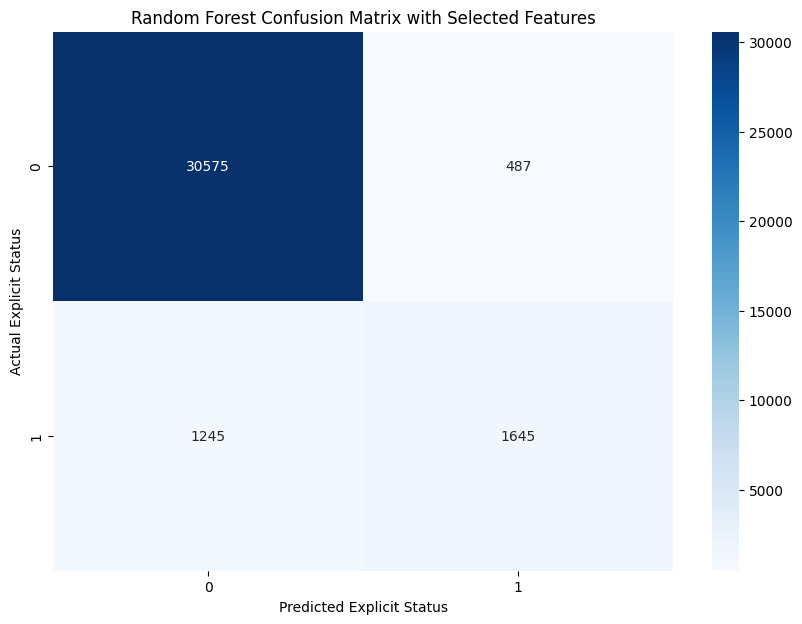

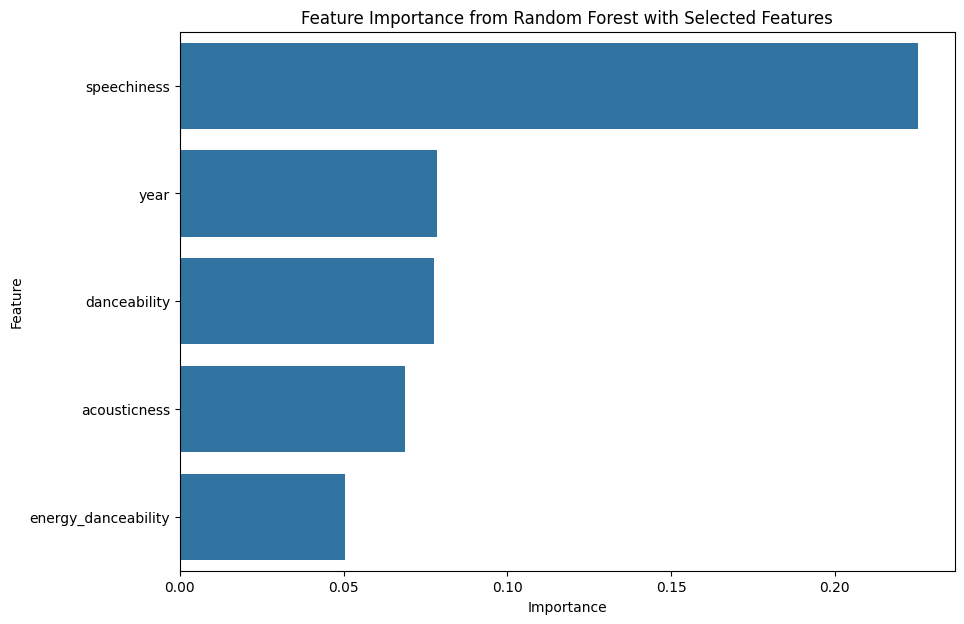

In [30]:
# Split the data into training and testing sets with selected features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Train the Random Forest model with selected features
rf_classifier.fit(X_train_selected, y_train)
y_pred_rf = rf_classifier.predict(X_test_selected)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy with Selected Features:", rf_accuracy)

# Confusion Matrix for Random Forest
plt.figure(figsize=(10, 7))
rf_cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Random Forest Confusion Matrix with Selected Features')
plt.xlabel('Predicted Explicit Status')
plt.ylabel('Actual Explicit Status')
plt.show()

# Feature Importance from Random Forest
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importances[indices[:n_features]]})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest with Selected Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Our results from the Random Forest model for predicting explicit content in songs demonstrate a high level of accuracy. The model achieved an overall accuracy of ~ 94.9% with a high precision of 96% for non-explicit songs, and 77% for explicit songs.

The recall rates were 98% for non-explicit songs and 57% for explicit songs. In other words the model is very good at correctly identifying non-explicit songs but it has  limitations in identifying explicit ones.

The confusion matrix highlights this displaying how  the model correctly identified 30,575 non-explicit songs and 1,645 explicit songs but misclassified 1,245 explicit songs as non-explicit (Type II error) and 487 non-explicit songs as explicit (Type I error).


Finally the feature importance analysis found that "speechiness" is the most important feature for predicting explicit content followed by the "year" of release then "danceability" and then "acousticness" and finally "energy_danceability."

This suggests that songs with higher speechiness are more likely to be explicit which makes sense as explicit content often involves spoken words.

Additionally the release year being a significant feature reflects trends in explicit content over time becoming more acceptable.

The model's ability to identify key features and its high accuracy make it a useful tool for predicting explicit content in songs but there is still room for improvement.

In [31]:
# Perform cross-validation on the Random Forest model
rf_cv_scores = cross_val_score(rf_classifier, X[selected_features], y, cv=5)
print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
print(f"Random Forest Mean Cross-Validation Score: {rf_cv_scores.mean()}")

Random Forest Cross-Validation Scores: [0.94863336 0.94645382 0.9458353  0.95526037 0.94842567]
Random Forest Mean Cross-Validation Score: 0.9489217037327539


The Random Forest model achieved cross-validation scores ranging from approximately 94.6% to 95.5%, indicating consistent performance across different subsets of the data. The mean cross-validation score of 94.9% demonstrates the model's reliability in predicting explicit content in songs.



---

Let's try with SVM classification to see what results it derives. Let's run SVM and compare its performance with the Random Forest model in terms of accuracy and  misclassifications.

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     31062
           1       0.57      0.11      0.19      2890

    accuracy                           0.92     33952
   macro avg       0.74      0.55      0.57     33952
weighted avg       0.89      0.92      0.89     33952

SVM Accuracy with Selected Features: 0.9170593779453345


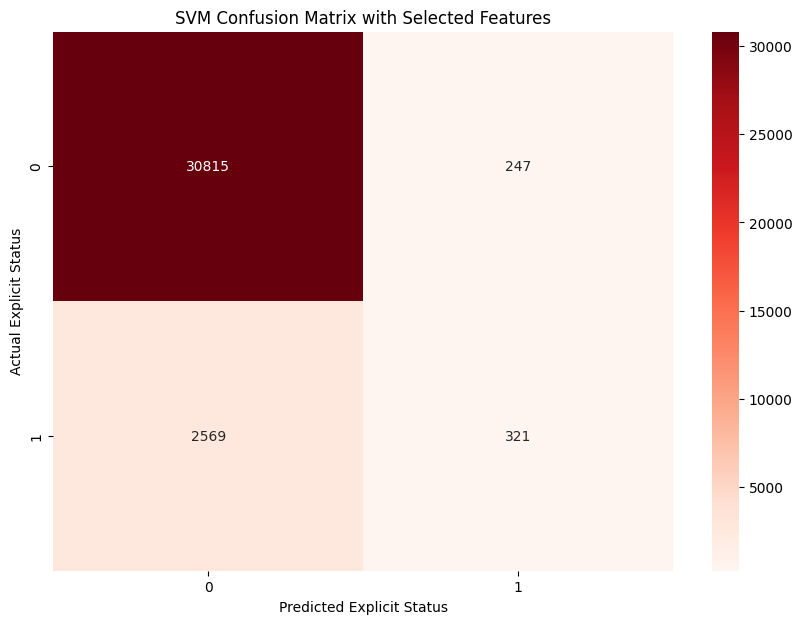

In [32]:
# Train the SVM model with selected features
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_selected, y_train)
y_pred_svm = svm_classifier.predict(X_test_selected)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy with Selected Features:", svm_accuracy)

# Confusion Matrix for SVM
plt.figure(figsize=(10, 7))
svm_cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Reds', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('SVM Confusion Matrix with Selected Features')
plt.xlabel('Predicted Explicit Status')
plt.ylabel('Actual Explicit Status')
plt.show()

Our results from the SVM model for predicting explicit content in songs demonstrate a good level of accuracy. The model achieved an overall accuracy of ~91.7% with a high precision of 92% for non-explicit songs, and 57% for explicit songs.

The recall rates were 99% for non-explicit songs and 11% for explicit songs. In other words the model is very good at correctly identifying non-explicit songs but it has significant limitations in identifying explicit ones.

The confusion matrix highlights this, displaying how the model correctly identified 30,815 non-explicit songs and 321 explicit songs but misclassified 2,569 explicit songs as non-explicit (Type II error) and 247 non-explicit songs as explicit (Type I error).

Comparing the two models the Random Forest model outperforms the SVM model in terms of overall accuracy, precision, and recall for explicit songs.







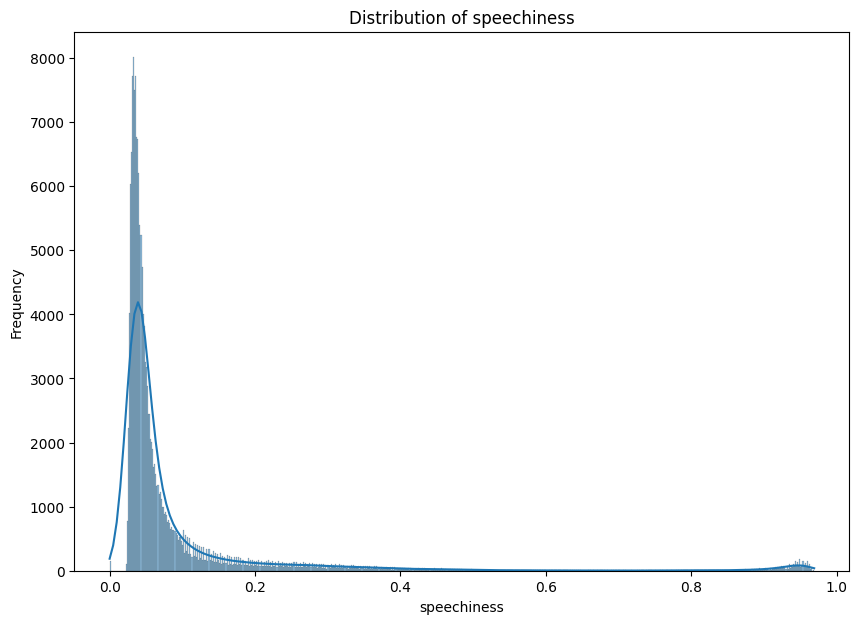

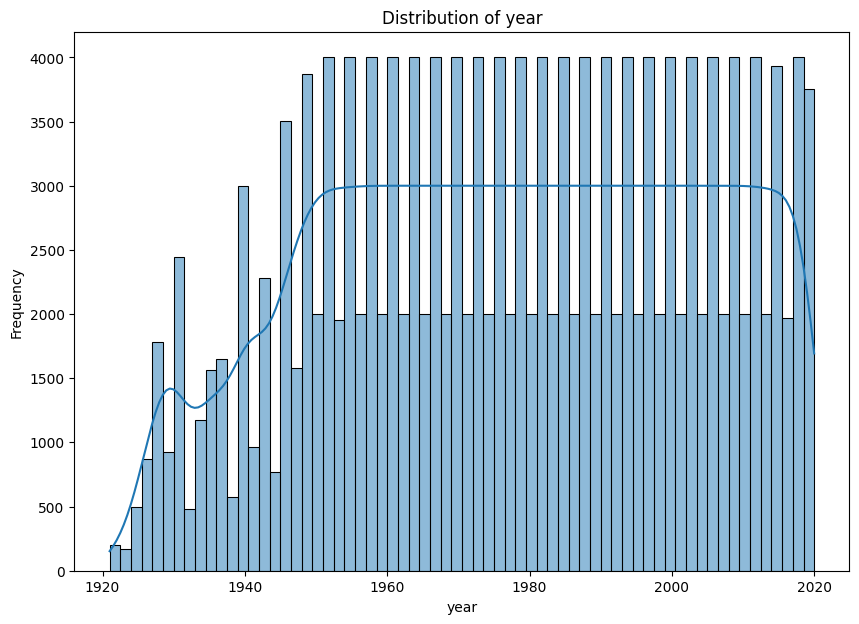

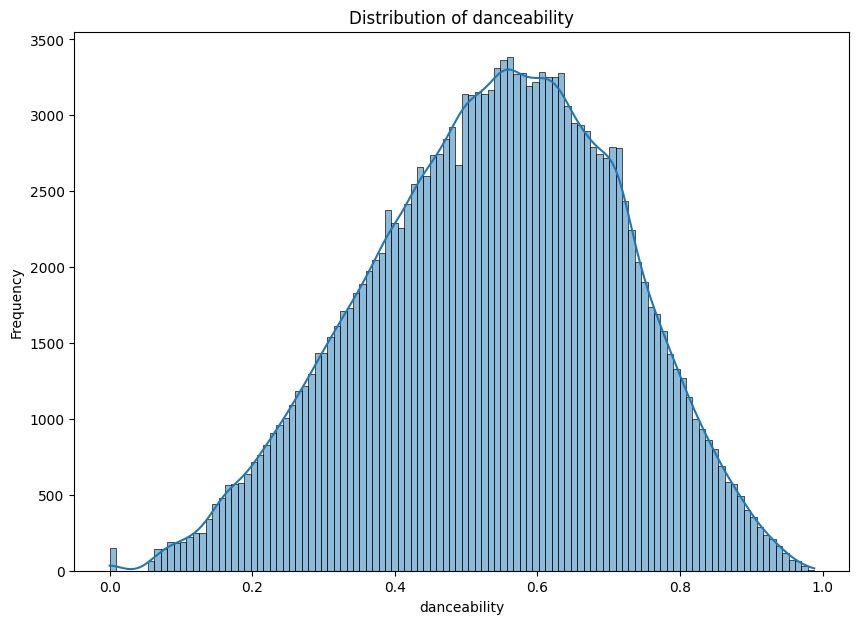

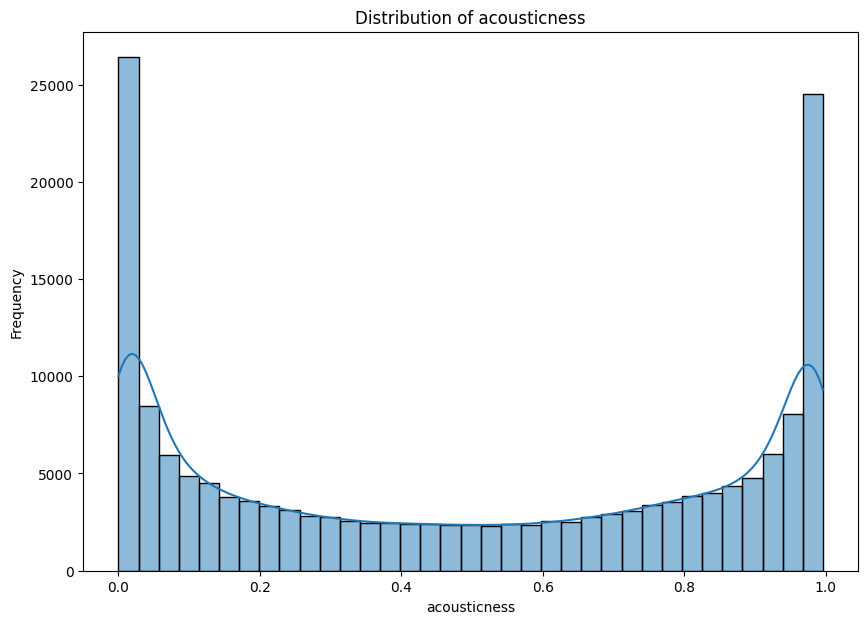

In [33]:
# Distribution of the most important feature
for i in range(4):
    plt.figure(figsize=(10, 7))
    sns.histplot(df[selected_features[i]], kde=True)
    plt.title(f'Distribution of {selected_features[i]}')
    plt.xlabel(selected_features[i])
    plt.ylabel('Frequency')
    plt.show()

Speechiness:
The distribution of "speechiness" is heavily skewed towards lower values with a sharp peak near 0. This indicates that most songs have low speechiness, meaning they contain fewer spoken words. However there is a small number of songs with high speechiness values which are likely to be spoken word content or rap songs contributing to their classification as explicit.

Year:
The distribution of "year" shows a relatively even spread across several decades, with a noticeable increase in the number of songs from the 1950s onwards. This reflects the growth of the music industry over time. The decline towards the most recent years might be due to incomplete data for the latest releases. This feature indicates that explicit content trends have evolved over time, which helps in understanding historical changes in music.

Danceability:
The distribution of "danceability" is approximately normal, centered around moderate values. This suggests that most songs in the dataset are reasonably danceable, with fewer songs at the extremes of the danceability spectrum. The even distribution implies that danceability is a consistent feature across different types of music, making it a useful predictor for explicit content when combined with other features.

Acousticness:
The distribution of "acousticness" is bimodal, with peaks at the very low and very high ends. This suggests a clear division between highly acoustic songs (such as ballads and classical music) and non-acoustic songs (such as electronic, hip-hop, rock music). The presence of these distinct groups indicates that acousticness can help differentiate between different types of songs and their likelihood of being explicit.




---


**Conclusion**
Our classification analysis using Random Forest and SVM models demonstrated that "speechiness" is the most critical feature for predicting explicit content in songs, followed by "year," "danceability," "acousticness," and "energy_danceability." The Random Forest model outperformed the SVM model in terms of accuracy, precision, and recall, particularly for identifying explicit songs. These findings suggest that explicit content in songs is closely associated with higher speechiness and evolving trends over time, providing valuable insights for content moderation and music recommendation systems.

#Song Popularity Predictor

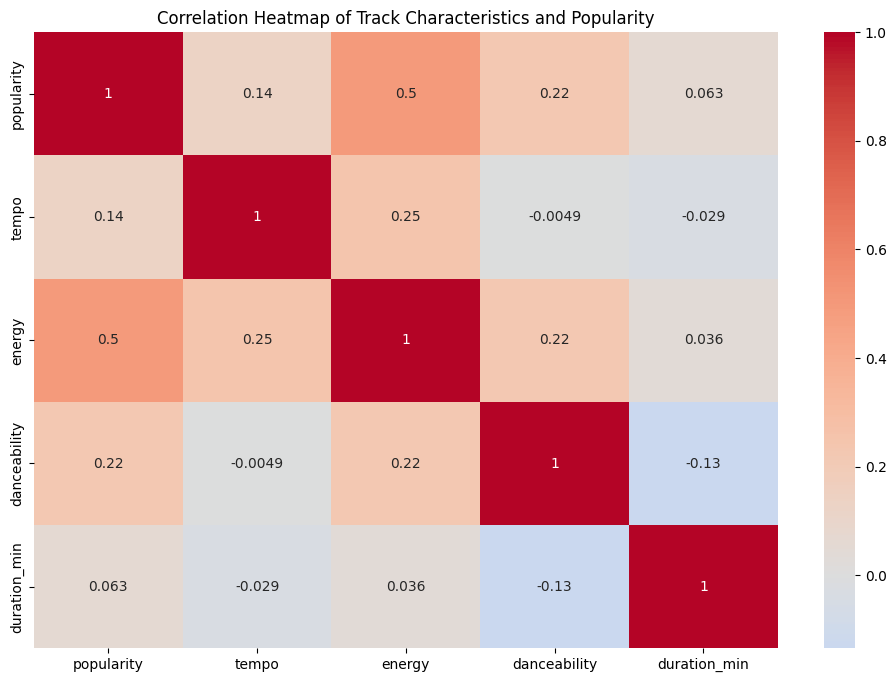

In [34]:
feature_columns = ['popularity', 'tempo', 'energy', 'danceability', 'duration_min']

df_selected = df[feature_columns]
correlation_matrix = df_selected.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Track Characteristics and Popularity')
plt.show()

In [35]:
correlation_matrix['popularity'].sort_values(ascending=False)

popularity      1.000000
energy          0.497488
danceability    0.221077
tempo           0.135047
duration_min    0.063292
Name: popularity, dtype: float64

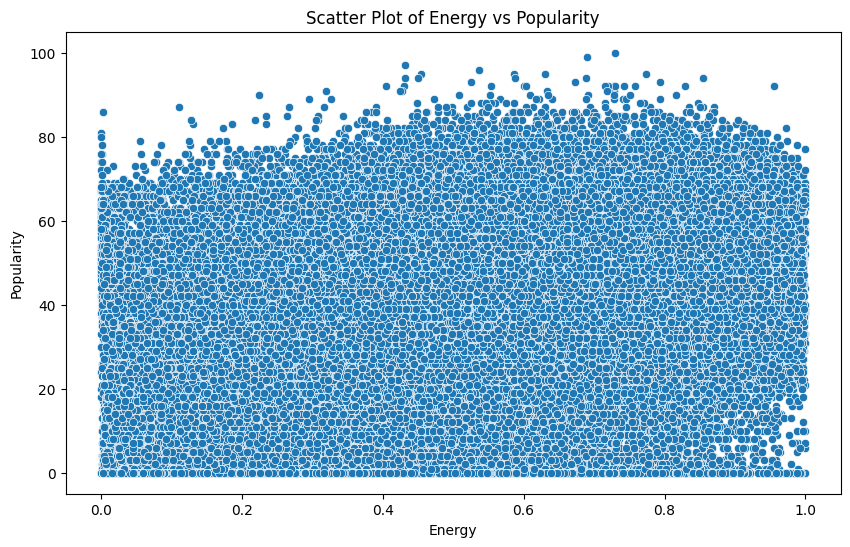

In [36]:
# Scatter Plot for 'energy' vs 'popularity'
df.dropna(subset=['energy'])
df = df[df['energy'] != 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='popularity', data=df)
plt.title('Scatter Plot of Energy vs Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.show()

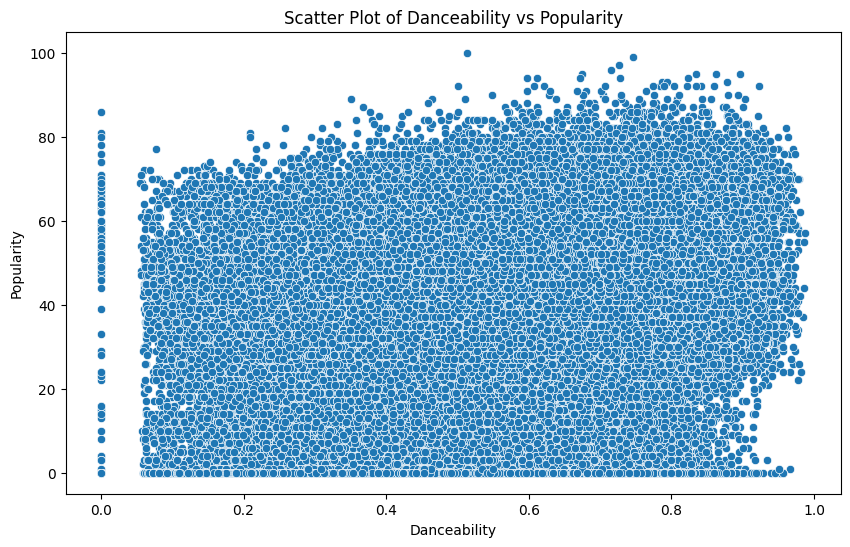

In [37]:
# Scatter Plot for 'danceability' vs 'popularity'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='popularity', data=df)
plt.title('Scatter Plot of Danceability vs Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

Not removing outliers as songs can be not danceable but they can be songs


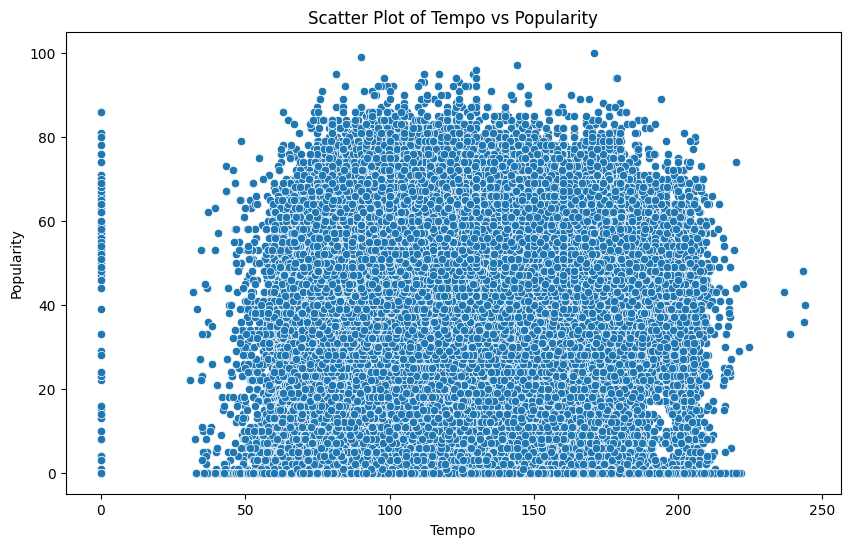

In [38]:
# Scatter Plot for 'tempo' vs 'popularity'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo', y='popularity', data=df)
plt.title('Scatter Plot of Tempo vs Popularity')
plt.xlabel('Tempo')
plt.ylabel('Popularity')
plt.show()

removing outliers are without tempo it is not really a song

In [39]:
# Filtering data to remove rows where 'tempo' is 0
filtered_tempo = df[df['tempo'] > 0]

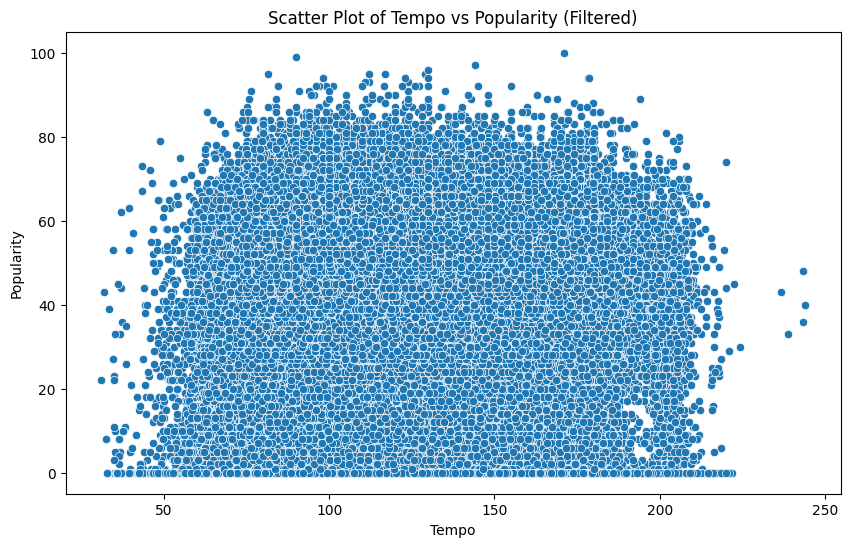

In [40]:
# Scatter Plot for filtered data 'tempo' vs 'popularity'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo', y='popularity', data=filtered_tempo)
plt.title('Scatter Plot of Tempo vs Popularity (Filtered)')
plt.xlabel('Tempo')
plt.ylabel('Popularity')
plt.show()

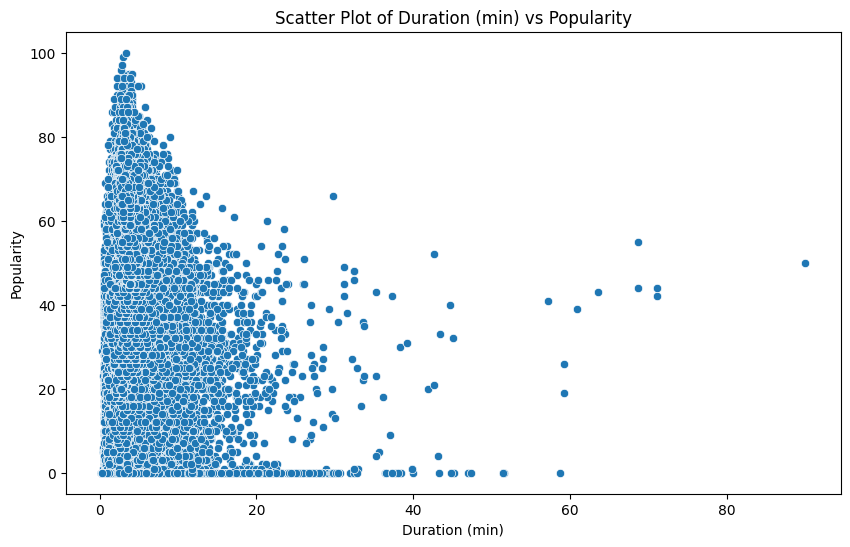

In [41]:
# Scatter Plot for 'duration_min' vs 'popularity'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_min', y='popularity', data=df)
plt.title('Scatter Plot of Duration (min) vs Popularity')
plt.xlabel('Duration (min)')
plt.ylabel('Popularity')
plt.show()

Songs are no more than 3-4 min long so thats why removing the outliers

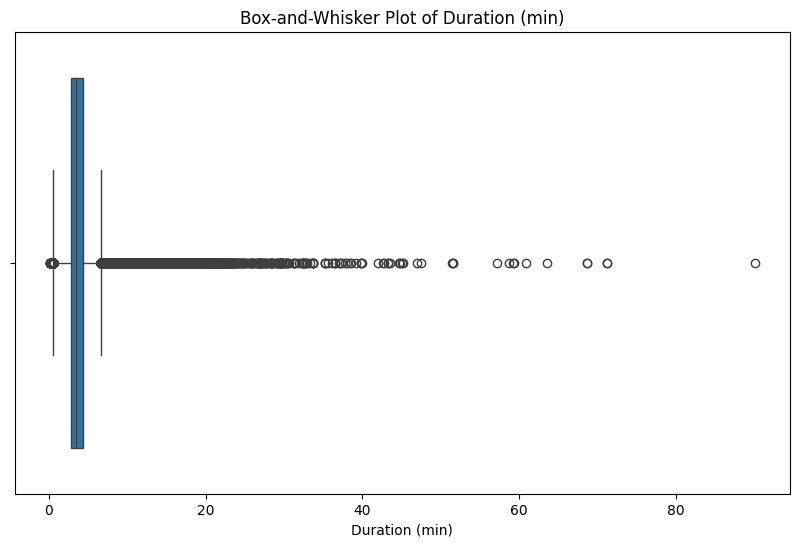

In [42]:
# Box-and-Whisker Plot to Identify Outliers in 'duration_min'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['duration_min'])
plt.title('Box-and-Whisker Plot of Duration (min)')
plt.xlabel('Duration (min)')
plt.show()

In [43]:
# Finding and printing the outliers
Q1 = df['duration_min'].quantile(0.25)
Q3 = df['duration_min'].quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)

2.8507
4.382883333333333
1.5321833333333332


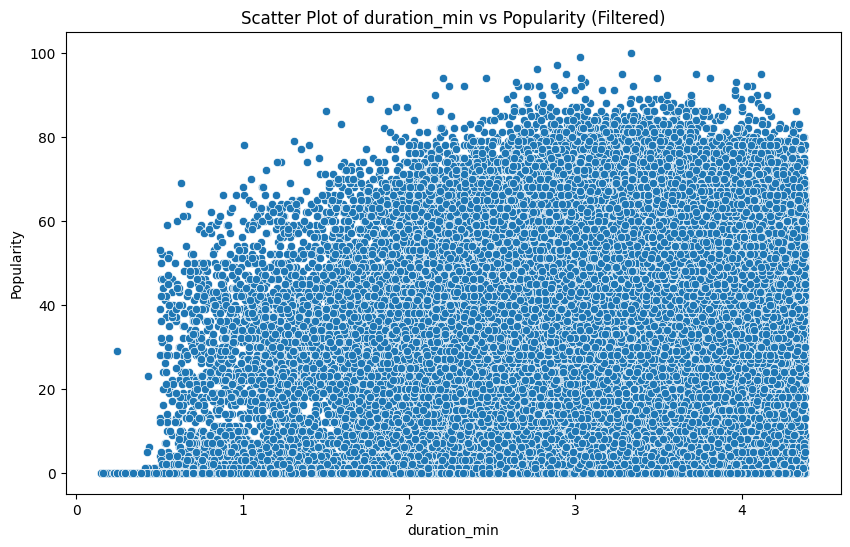

In [44]:
outliers = df[(df['duration_min'] > (Q3 + 1.5 * IQR))]
#print(outliers)
filtered_duration = df[df['duration_min'] <= Q3]
# Scatter Plot for filtered data 'tempo' vs 'popularity'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_min', y='popularity', data=filtered_duration)
plt.title('Scatter Plot of duration_min vs Popularity (Filtered)')
plt.xlabel('duration_min')
plt.ylabel('Popularity')
plt.show()

In [45]:
# Showing the filtered DataFrame
#print("Filtered DataFrame:")
#print(filtered_df)
filtered_df = df[(df['tempo'] > 0) & (df['duration_min'] <= 5)]
final_df = filtered_df[['energy', 'danceability', 'tempo', 'duration_min', 'popularity']]
final_df = final_df.drop_duplicates()

# Show the final DataFrame after dropping duplicates
print(final_df)

        energy  danceability    tempo  duration_min  popularity
0       0.1950         0.708  118.469      2.644133           0
1       0.0135         0.379   83.972      4.702217           0
2       0.2200         0.749  107.177      1.738333           0
3       0.1300         0.781  108.003      3.012667           0
6       0.1970         0.444   80.495      2.277117           0
...        ...           ...      ...           ...         ...
169904  0.4430         0.875  100.012      2.730000          75
169905  0.3850         0.719  128.000      2.791133          64
169906  0.5390         0.514  123.700      3.011667          70
169907  0.7610         0.646  129.916      2.788467          70
169908  0.4280         0.512   80.588      3.579783          65

[142688 rows x 5 columns]


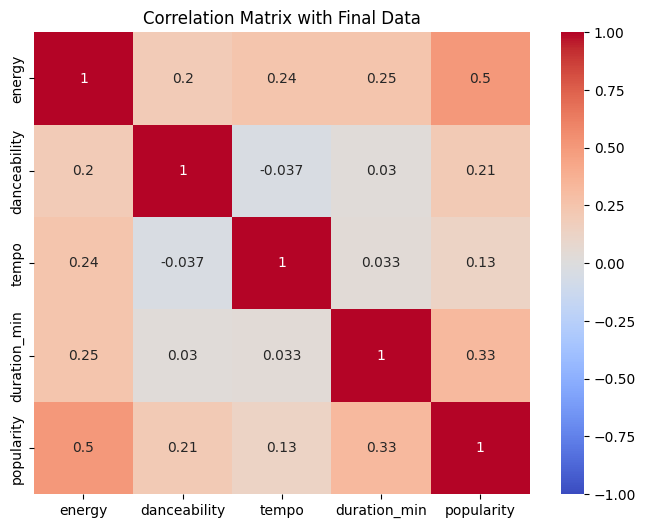

In [46]:
plt.figure(figsize=(8, 6))
correlation_matrix = final_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix with Final Data')
plt.show()

No correleation change in Energy, Danceability as expected. Even tho removing 0's from tempo, the correlation doesnt change, while we notice that as duration of the song was constrained the correlation showed a positive increase indicating shorter duration songs do show correleation with how popular a song is

In [47]:
# LINEAR REGRESSION ONLY USING ENERGY AS IT IS HIGHEST CORRELEATED

X = final_df[['energy']]
y = final_df['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 360.6237741499662
R^2 Score: 0.2558107318345475


In [48]:
# LINEAR REGRESSION USING ALL THE HIGHEST CORRELEATED FEATURES

X = final_df[['energy', 'danceability', 'tempo', 'duration_min']]
y = final_df['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 333.3650663904433
R^2 Score: 0.31206225830839396


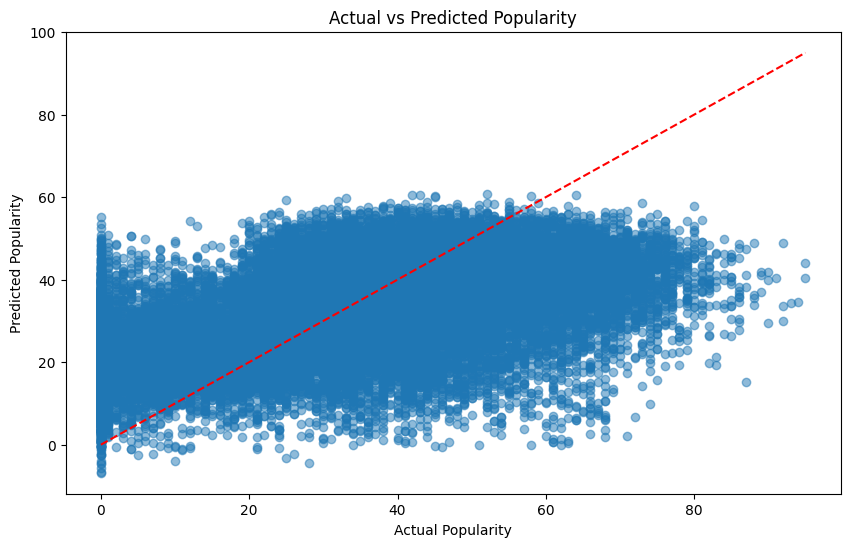

In [49]:
# Scatterplot of the final model's predictions vs true values
# Plot actual vs predicted values
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity')
plt.show()

In [50]:
# LINEAR REGRESSION USING REMAINDER FEATURES EXCLUDING HIGHEST CORRLEATED
# ['acousticness', 'instrumentalness', 'valence', 'liveness', 'loudness', 'speechiness']
# Drop NaN values and zeros from the relevant features
features = ['acousticness', 'instrumentalness', 'valence', 'liveness', 'loudness', 'speechiness']
df = df.dropna(subset=features)
for feature in features:
    df = df[df[feature] != 0]

# Define the features (X) and the target (y)
X = df[features]
y = df['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 257.27372647059843
R^2 Score: 0.41851134045889227


In [51]:
# LINEAR REGRESSION USING FILTERED DATA & REST OF THE FEATRUES
# Merge final_df and df_additional on their index
merged_df = final_df.merge(df[features], left_index=True, right_index=True)

# Define the features (X) and the target (y)
combined_features = ['energy', 'danceability', 'tempo', 'duration_min'] + features
X = merged_df[combined_features]

# Use the correct column name for popularity (check the column names after merging)
# It might be 'popularity' if it wasn't duplicated during the merge.
y = merged_df['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 248.6730146771482
R^2 Score: 0.45747948027739527


***BEST MODEL***

LINEAR REGRESSION USING FILTERED DATA & REST OF THE FEATRUES:
- this was the best model as it had the lowest MSE, and the highest R^2.

Coefficients:
                  Coefficient
energy              12.221559
danceability        25.564725
tempo                0.027374
duration_min         1.790895
acousticness       -24.536212
instrumentalness    -6.159224
valence            -22.531511
liveness            -7.878730
loudness            -0.048211
speechiness        -26.928209
Intercept: 30.165292562897562


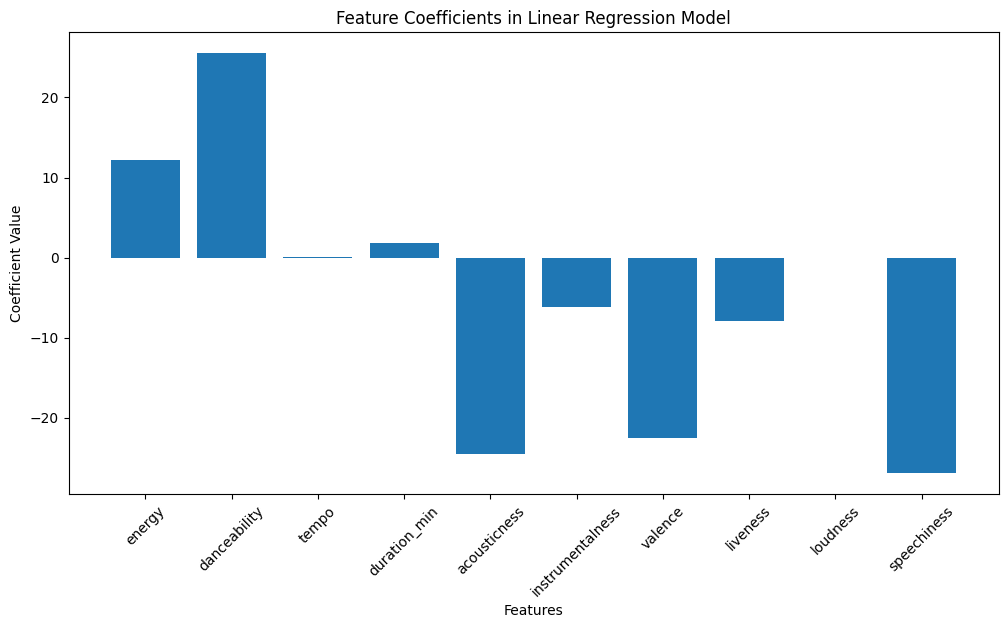

In [52]:
# coeffictents graph
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Coefficients:")
print(coefficients)
print(f"Intercept: {model.intercept_}")

# Plot the coefficients
plt.figure(figsize=(12, 6))
plt.bar(coefficients.index, coefficients['Coefficient'])
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients in Linear Regression Model')
plt.xticks(rotation=45)
plt.show()

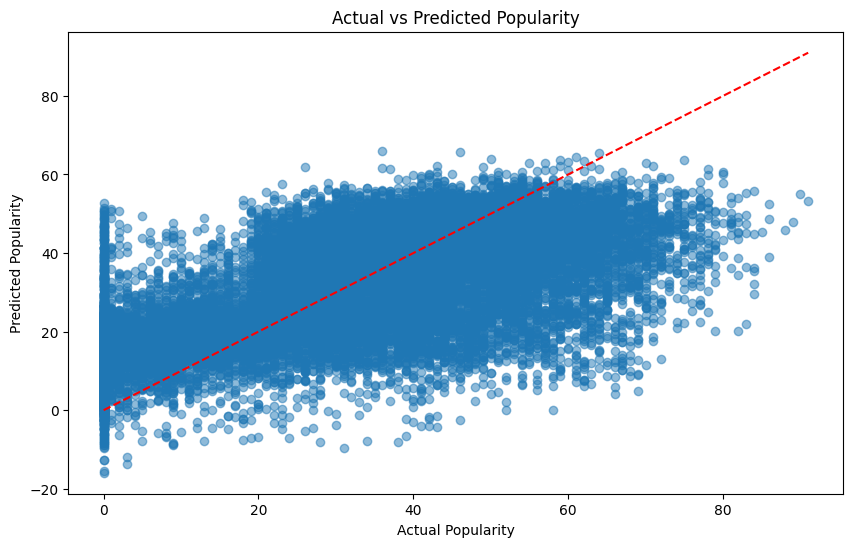

In [53]:
# Scatterplot of the final model's predictions vs true values
# Plot actual vs predicted values
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity')
plt.show()

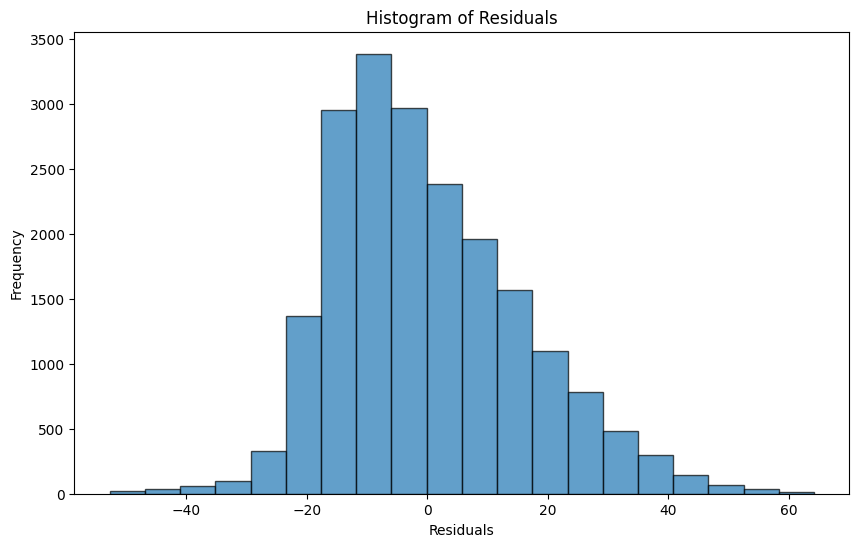

In [54]:
# Calculate residuals
residuals = y_test - y_pred

# Plot the histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

***CONCLUSION***

**Summary of Regression Models**

- Model 1: Using Only 'Energy' Feature

Mean Squared Error (MSE): High

R² Score: Low (0.255)

Observation: Using only the 'energy' feature explains only a small portion of the variance in popularity. Performed very poor.

- Model 2: Using Cleaned Features of ['energy', 'danceability', 'tempo', 'duration_min']

Mean Squared Error (MSE): High

R² Score: Slightly higher or similar (0.312)

Observation: Adding only some features that were highly correleated still did not perform well.

- Model 3: Using Least Correleated Features

Mean Squared Error (MSE): Slightly lower but still High

R² Score: Improved (0.418)

Observation: Including more features improves the model performance but still leaves a significant portion of variance unexplained. It performs better than the model that included features with the highest correlation.

- Model 4: Using All Available Features ['acousticness', 'instrumentalness', 'valence', 'liveness', 'loudness', 'speechiness', 'energy', 'danceability', 'tempo', 'duration_min']

Mean Squared Error (MSE): Lowest

R² Score: Highest (0.457)

Observation: This model performs the best among all the models considered, showing that more sets of features can better captures the variance in popularity.

- Conclusions

Feature Importance: Including additional features significantly improves the model's ability to explain the variance in the target variable. This suggests that popularity is influenced by a combination of multiple factors rather than a single feature like energy.

Model Choice: Despite the improvements, the R² scores indicate that a large portion of the variance in popularity remains unexplained. This suggests that Linear Regression may not be the best model for this dataset.

#Audio Feature based Recommendation Engine

In [55]:
df.columns

Index(['acousticness', 'artists', 'danceability', 'energy', 'explicit', 'id',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'popularity', 'speechiness', 'tempo', 'valence', 'year', 'duration_min',
       'decade'],
      dtype='object')

## Model Building

Methods:
In building k-clustering models its much easier and more precise to use numerical values rather than categorical because sample space is discrete while expecting a continuous space. Therefore i have chosen to only use numerical features for this model training.

In [56]:
temp = tracks

X = temp.drop(['id', 'name','explicit', 'artists', 'mode', 'year',
               'key', 'decade', 'duration_min','popularity', 'energy'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

Computation time for elbow curve with 30 iterations: 270.33 s


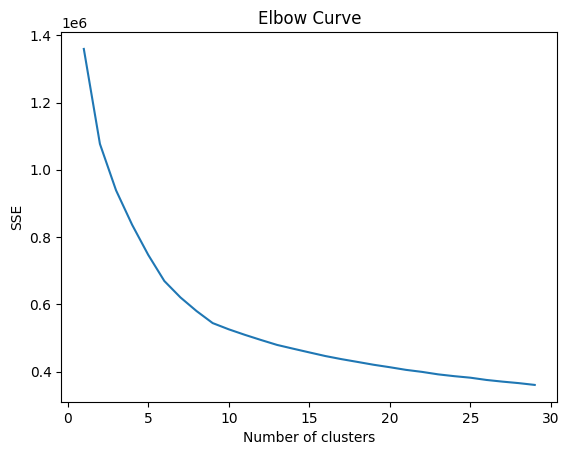

In [57]:
sse = {}

t0 = time.time()
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100).fit(X)
    sse[k] = kmeans.inertia_
t1 = time.time()
diff = t1 - t0
print('Computation time for elbow curve with 30 iterations: {:.2f} s'.format(diff))


plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title('Elbow Curve')
plt.show()

Result of the elbow test shows that the optimal k = 9.

In [58]:
model = KMeans(
    n_clusters=9, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0,
)
y_pred = model.fit_predict(X)

In [59]:
score = silhouette_score(X, model.labels_, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.186


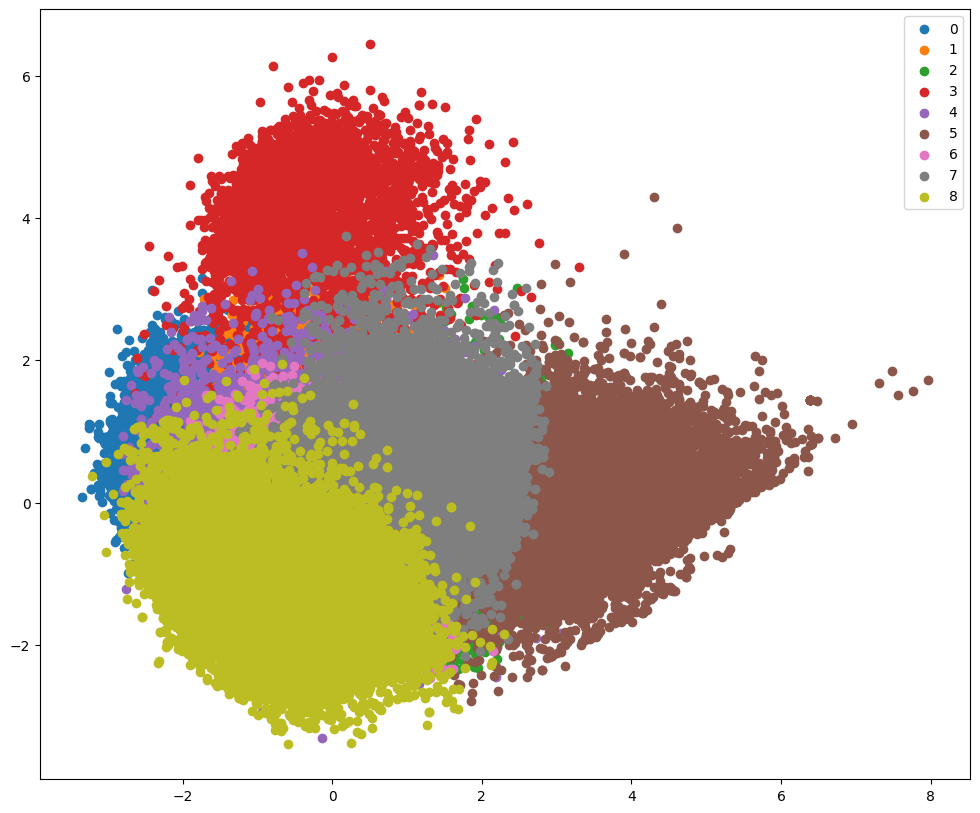

In [60]:
# reduce dimensions of data to 2 with PCA for visualization

pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

X_red = pd.DataFrame(X_transformed)
X_red['label'] = y_pred

unique_labels = np.unique(y_pred)

plt.figure(figsize=(12,10))
for i in unique_labels:
    plt.scatter(X_red[X_red['label'] == i].iloc[:, 0], X_red[X_red['label'] == i].iloc[:, 1], label=i)
plt.legend()
plt.show()

I am happy with these results because the clusters are easily recognizable however they are not fully separated and the sse is relatively high so the model could still use some work.

## Rec Engine

To recommend songs, we first find the cluster of the given song.
We then select other songs from the same cluster, ensuring they share similar audio features.
If there are more songs in the cluster than the required number of recommendations, we randomly sample the required number of songs.
The recommended songs are expected to have similar audio characteristics to the original song due to their proximity in the feature space.

In [61]:
temp['cluster'] = y_pred

def recommend_songs(song_id, n_recommendations=10):
    song_cluster = temp[temp['id'] == song_id]['cluster'].values[0]
    cluster_songs = temp[temp['cluster'] == song_cluster]
    recommendations = cluster_songs[cluster_songs['id'] != song_id]

    if len(recommendations) > n_recommendations:
        recommendations = recommendations.sample(n=n_recommendations)

    return recommendations[['name', 'artists', 'id']]


sample_song_id = df['id'].iloc[0]
recommended_songs = recommend_songs(sample_song_id)

Song: Godsend, Artists: Beat Happening, Similarity (Euclidean Distance): 5.04
Song: Ellinopoyles omorfes, Artists: Roza Eskenazi, Similarity (Euclidean Distance): 5.33
Song: La resa dei conti (Seconda caccia), Artists: Ennio Morricone, Similarity (Euclidean Distance): 12.99
Song: Pulcinella Suite: VIIIb. Finale. Allegro assai, Artists: Igor Stravinsky, Columbia Symphony Orchestra, Similarity (Euclidean Distance): 17.33
Song: Mi Chapalita - Remasterizado, Artists: Francisco Canaro, Carlos Roldán, Similarity (Euclidean Distance): 21.24
Song: The Shade of the Mango Tree, Artists: Luiz Bonfá, Similarity (Euclidean Distance): 26.41
Song: Shiraki Gevondi (Folk Dance), Artists: A. Merangulian, Shirak Roundelays, Similarity (Euclidean Distance): 27.03
Song: Le sacre du printemps: Part 1 "Adoration of the Earth", Games of the Rival Clans, Artists: Igor Stravinsky, Columbia Symphony Orchestra, Similarity (Euclidean Distance): 32.51
Song: Watkins Production, Artists: Art Pepper, Sonny Redd, Simil

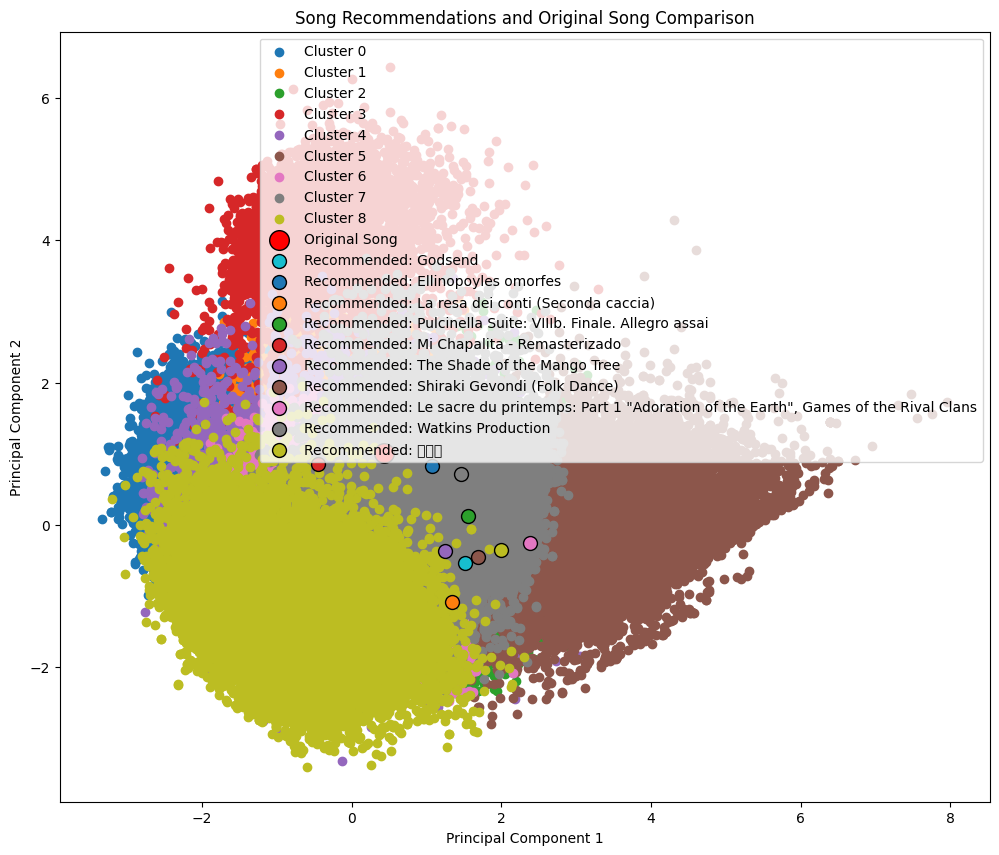

In [63]:
def compare_songs(original_song_id, recommended_songs):
    original_song_features = df[df['id'] == original_song_id].drop(['id', 'name','explicit', 'artists', 'mode', 'year',
               'key', 'decade', 'duration_min','popularity', 'energy'], axis=1).values

    comparisons = []
    for _, song in recommended_songs.iterrows():
        recommended_song_features = df[df['id'] == song['id']].drop(['id', 'name','explicit', 'artists', 'mode', 'year',
               'key', 'decade', 'duration_min','popularity', 'energy'], axis=1).values
        distance = euclidean_distances(original_song_features, recommended_song_features)[0][0]
        comparisons.append((song['name'], song['artists'], song['id'], distance))
    comparisons.sort(key=lambda x: x[3])
    return comparisons

#testing
original_song_id = sample_song_id
recommended_songs_list = recommend_songs(original_song_id)

comparisons = compare_songs(original_song_id, recommended_songs_list)


for song in comparisons:
    print(f"Song: {song[0]}, Artists: {song[1]}, Similarity (Euclidean Distance): {song[3]:.2f}")

# Visualization
def visualize_comparisons(original_song_id, comparisons):
    pca = PCA(n_components=2)
    X_transformed = pca.fit_transform(X)

    X_red = pd.DataFrame(X_transformed, columns=['PC1', 'PC2'])
    X_red['id'] = df['id']
    X_red['label'] = temp['cluster']

    plt.figure(figsize=(12, 10))
    for label in np.unique(y_pred):
        plt.scatter(X_red[X_red['label'] == label]['PC1'],
                    X_red[X_red['label'] == label]['PC2'], label=f'Cluster {label}')

    original_song_pca = X_red[X_red['id'] == original_song_id]
    plt.scatter(original_song_pca['PC1'], original_song_pca['PC2'], color='red', label='Original Song', s=200, edgecolor='black')
    for song in comparisons:
        song_pca = X_red[X_red['id'] == song[2]]
        plt.scatter(song_pca['PC1'], song_pca['PC2'], label=f'Recommended: {song[0]}', s=100, edgecolor='black')

    plt.legend()
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Song Recommendations and Original Song Comparison')
    plt.show()

visualize_comparisons(original_song_id, comparisons)

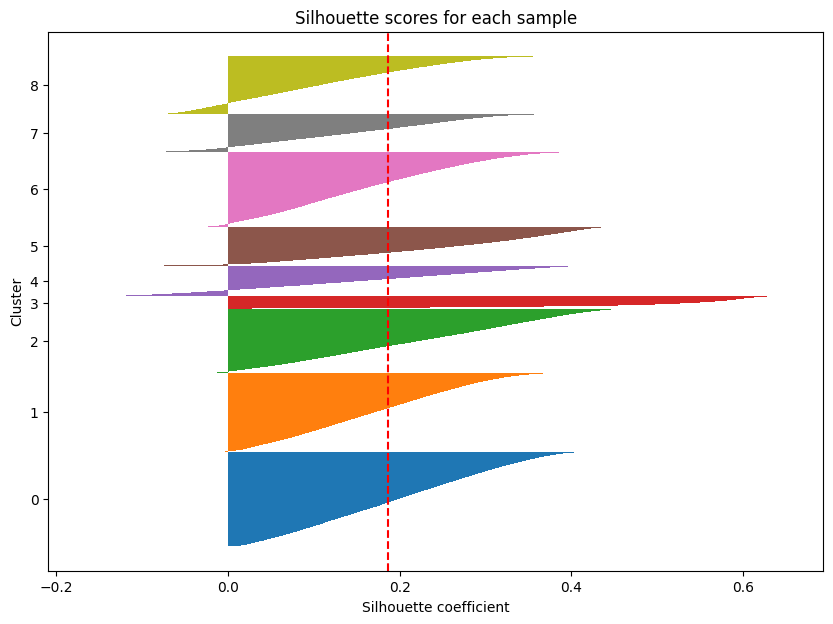

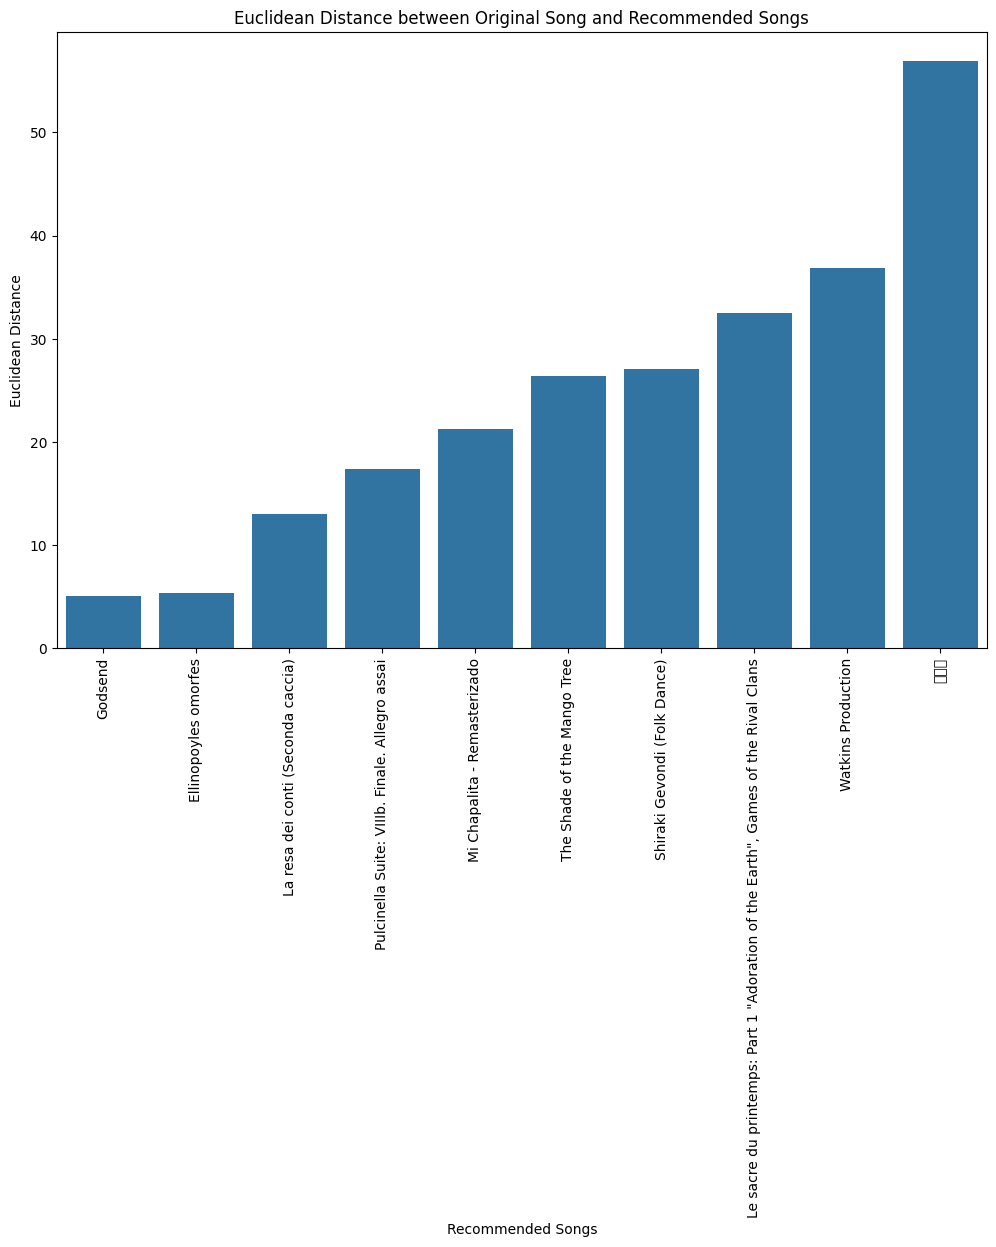

In [64]:
def plot_silhouette_scores(X, labels):
    silhouette_vals = silhouette_samples(X, labels, metric='euclidean')
    y_ticks = []
    y_lower, y_upper = 0, 0

    plt.figure(figsize=(10, 7))

    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        y_ticks.append((y_lower + y_upper) / 2)
        y_lower += len(cluster_silhouette_vals)

    plt.axvline(np.mean(silhouette_vals), color="red", linestyle="--")
    plt.yticks(y_ticks, np.unique(labels))
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.title('Silhouette scores for each sample')
    plt.show()

plot_silhouette_scores(X, y_pred)


def plot_recommendation_quality(comparisons):
    songs, distances = zip(*[(song[0], song[3]) for song in comparisons])

    plt.figure(figsize=(12, 8))
    sns.barplot(x=songs, y=distances)
    plt.xticks(rotation=90)
    plt.xlabel('Recommended Songs')
    plt.ylabel('Euclidean Distance')
    plt.title('Euclidean Distance between Original Song and Recommended Songs')
    plt.show()

plot_recommendation_quality(comparisons)

## Clustering Conclusion:
**Feature Extraction:** Selecting relevant audio features for similarity calculations.

**Normalization:** Ensuring all features contribute equally to the distance metrics.

**Clustering:** Using KMeans to group similar songs together.

**Dimensionality Reduction:** Using PCA for visualization and understanding the clusters.

**Recommendation:** Finding and recommending songs from the same cluster.

**Evaluation:** Comparing the recommended songs to the original song using Euclidean distance and visualizing the results.

# Final Conclusions

## Data Exploration

**Feature Distribution:**

Features such as energy, danceability, and loudness showed varied distributions. Some features had normal distributions, while others were skewed, indicating potential outliers or non-normality in the data.

**Correlation Analysis:**

A correlation matrix was created to identify the relationships between different features. It was observed that some features had significant correlations, such as energy and loudness, while others were weakly correlated with the target variable (popularity).

**Missing Values and Outliers:**

The data was checked for missing values and outliers. Missing values were handled through imputation or removal, ensuring the dataset was clean for modeling.
Models
Various models were built and evaluated to predict the target variable (popularity).

## The models included:


**Linear Regression:**

Linear regression was used as a baseline model. While it provided some insights, the R² scores indicated that it couldn't capture the complexity of the dataset adequately.


**K-Means Clustering:**

K-Means clustering was employed to group the data into clusters based on numerical features. The Silhouette Score was used to evaluate the quality of the clusters, with a score of 0.186 indicating moderate clustering performance. However, the clusters were not fully separated, suggesting room for improvement.

**Random Forest and Other Advanced Models:**

Advanced models such as Random Forest were applied to enhance prediction accuracy. These models showed improved performance compared to linear regression, highlighting the importance of non-linear relationships in the dataset.